<a href="https://colab.research.google.com/github/ARAN-ai-python/UsedcarValuePrediction_AI/blob/main/jupyter%20notebook/3.%E4%B8%AD%E5%8F%A4%E8%BB%8A%E4%BE%A1%E6%A0%BC%E4%BA%88%E6%B8%ACAI(%E4%BE%A1%E6%A0%BC_com)_%E3%83%87%E3%83%BC%E3%82%BF%E5%89%8D%E5%87%A6%E7%90%86%E6%A4%9C%E8%A8%8E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#カラム毎に関数にして、それらを一つの関数で一気に実行する形にしようかと考えている。
#ex.) def page_preprocessing(df):

In [ ]:
import numpy as np
import pandas as pd

#pandasのデータフレームの行・列表示制限を解除
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

#numpyの表示数制限を解除
np.set_printoptions(threshold=np.inf)


df = pd.read_pickle('Car_Bigdata_Merged.pickle').drop_duplicates()
print(len(df))
df.reset_index(inplace=True, drop=True)
df.tail(10)

56590


,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション
56580,23637730,ワゴンＲ ２５周年記念車,130.0,（総額 158.7万円）,アーバンブラウンパールメタリック,令和元年(2019年),1.0万km,沖縄県,2022/01,修復歴なし,−,−,−,"販売店保証付(無料保証 期限:2022年1月 距離:60,000km ※いずれかの条件に達す...",CVT,2WD,660cc,5ドア,4名,その他,右ハンドル,649（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,650mm※1",790kg※1,33.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS アル...
56581,25656371,ｅＫワゴン Ｍ,99.8,（総額 107.5万円）,ホワイト,令和元年(2019年),1.0万km,沖縄県,2022/09,修復歴なし,−,−,○,"販売店保証付(無料保証 期限:2029年9月 距離:100,000km ※いずれかの条件に達...",CVT,2WD,660cc,5ドア,4名,ガソリン,右ハンドル,823（下3桁）,記録簿あり,リ済別,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-05-31）,"3,395mm※1","1,475mm※1","1,640mm※1",830kg※1,29.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
56582,25373400,ｅＫスペース Ｇ,139.0,,ブラックＭ,令和元年(2019年),1.0万km,沖縄県,車検整備なし,修復歴なし,−,−,−,販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,CVT,2WD,660cc,5ドア,4名,ガソリン,右ハンドル,503（下3桁）,,リ済別,法定整備なし,,"3,395mm※1","1,475mm※1","1,775mm※1",940kg※1,22.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ キーレスエン...
56583,26009098,トール カスタムＧ,167.0,（総額 170.0万円）,ブラックマイカメタリック,令和元年(2019年),1.0万km,沖縄県,2021/08,修復歴なし,−,−,−,販売店保証なし,CVT,2WD,1000cc,5ドア,5名,ガソリン,右ハンドル,576（下3桁）,,リ済込,法定整備なし,,"3,725mm※1","1,670mm※1","1,735mm※1","1,080kg※1",24.6km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ バックモニターカメラ キーレスエントリー エ...
56584,26084684,ハイゼットカーゴ クルーズＳＡＩＩＩ,145.0,（総額 149.0万円）,ブラック,令和元年(2019年),1.0万km,沖縄県,2023/01,修復歴なし,−,−,○,販売店保証付(無料保証 期間:24ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,AT,2WD,660cc,5ドア,4名,ガソリン,右ハンドル,857（下3桁）,,リ済込,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
56585,26873346,シエンタ ハイブリッドＸ,215.0,,パールマイカ,令和元年(2019年),1.0万km,沖縄県,車検整備なし,修復歴なし,−,−,−,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,AT,2WD,1500cc,5ドア,7名,その他,右ハンドル,057（下3桁）,記録簿あり,リ済別,法定整備付,,"4,235mm※1","1,695mm※1","1,675mm※1","1,380kg※1",27.2km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ バックモニターカメラ テレビ ETC エアバ...
56586,26829511,クラウンハイブリッド Ｓ,397.0,（総額 398.0万円）,パールホワイト,令和元年(2019年),1.0万km,沖縄県,2022/08,修復歴あり,−,−,○,販売店保証付(無料保証 期間:24ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,2WD,2500cc,4ドア,5名,その他,右ハンドル,702（下3桁）,,リ済込,法定整備付,,"4,910mm※1","1,800mm※1","1,455mm※1","1,740kg※1",24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
56587,26817739,ｅＫワゴン Ｍ,84.0,,スターリングシルバーメタリック,令和元年(2019年),1.0万km,沖縄県,2022/01,修復歴なし,−,−,−,"販売店保証付(無料保証 期間:24ヵ月 距離:30,000km ※いずれかの条件に達するまで...",CVT,2WD,660cc,5ドア,4名,ガソリン,右ハンドル,117（下3桁）,,リ済別,法定整備なし,,"3,395mm※1","1,475mm※1","1,640mm※1",830kg※1,29.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
56588,25282778,カローラフィールダー １．５Ｇ,198.0,（総額 217.8万円）,パールマイカ,令和元年(2019年),1.0万km,沖縄県,車検整備なし,修復歴なし,−,−,−,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,AT,2WD,1500cc,5ドア,5名,ガソリン,右ハンドル,773（下3桁）,記録簿あり,リ済別,法定整備付,,"4,410mm※1","1,695mm※1","1,510mm※1","1,140kg※1",23.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ エアバッグ ABS アルミホイール
56589,26078315,プレミオ １．５Ｆ,210.0,,ワイン,令和元年(2019年),1.0万km,沖縄県,2022/12,修復歴なし,−,−,−,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,2WD,1500cc,4ドア,5名,ガソリン,右ハンドル,717（下3桁）,記録簿あり,リ済別,法定整備付,,"4,595mm※1","1,695mm※1","1,475mm※1","1,200kg※1",18.2km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...


In [ ]:
#url検索フォーム
df['ページ'][1]

'27121735'

In [ ]:
list(df.columns)

['ページ',
 '車名',
 '価格',
 '総額',
 '色',
 '年式',
 '走行距離',
 '地域',
 '車検',
 '修復歴',
 '未使用車',
 'ワンオーナー',
 '禁煙車',
 '保証',
 'ミッション',
 '駆動方式',
 '排気量',
 'ドア数',
 '乗車定員',
 '燃料',
 'ハンドル',
 '車台番号',
 '記録簿',
 'リサイクル料',
 '整備',
 'ID車両(グー鑑定)',
 '全長',
 '全幅',
 '全高',
 '車両重量',
 '燃費',
 '使用燃料',
 'オプション']

In [ ]:
#pandasのデータフレームの行・列表示制限を解除
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

#numpyの表示数制限を解除
np.set_printoptions(threshold=np.inf)

display(df.head(10))

,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション
0,27129593,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,パールブラック,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,403（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
1,27121735,ムーヴキャンバス ＧホワイトアクセントＶＳ,160.0,（総額 166.6万円）,ブルーミングピンクＭ,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,786（下3桁）,記録簿あり,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,655mm※1",970kg※1,27.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS
2,27121713,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,シャイニングホワイトパール,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,475（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 両側...
3,26844930,Ｎ−ＢＯＸ Ｌ,156.7,（総額 167.4万円）,プラチナホワイト・パール,令和3年(2021年),3km,北海道,2024/06,修復歴なし,−,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,583（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-06-24）,"3,395mm※1","1,475mm※1","1,815mm※1",960kg※1,25.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
4,26490416,スペーシア ハイブリッドＧ,119.7,（総額 130.3万円）,アーバンブラウンパールメタリック,令和3年(2021年),3km,北海道,2024/03,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,892（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-15）,"3,395mm※1","1,475mm※1","1,785mm※1",900kg※1,26.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ キーレスエントリー エアバッグ A...
5,26282556,ムーヴ カスタム,170.2,（総額 177.2万円）,パールマイカ,令和3年(2021年),3km,北海道,2024/03,修復歴なし,○,−,−,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,594（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,630mm※1",890kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
6,26105257,ＣＸ−５ ＸＤ,317.8,（総額 342.0万円）,スノーフレイクホワイトパールマイカ,令和3年(2021年),3km,北海道,2024/07,修復歴なし,○,−,○,販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,4WD,2200cc,5ドア,5名,ディーゼル,右ハンドル,654（下3桁）,,リ済込,法定整備なし,,"4,545mm※1","1,840mm※1","1,690mm※1","1,680kg※1",17.2km/L※1,ディーゼル※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
7,27096885,ハスラー ハイブリッドＧ,142.0,,クールカーキー,令和3年(2021年),4km,北海道,2024/06,修復歴なし,−,−,−,"販売店保証付(無料保証 期限:2026年6月 距離:100,000km ※いずれかの条件に達...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,641（下3桁）,,リ済別,"法定整備別（整備費19,800円）",,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
8,27081191,ムーヴ ＸリミテッドＩＩ,133.0,（総額 139.6万円）,シャイニングホワイトパール,令和3年(2021年),4km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,656（下3桁）,記録簿あり,リ済別,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-22）,"3,395mm※1","1,475mm※1","1,630mm※1",880kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
9,27052930,ハスラー ハイブリッドＧ,151.0,（総額 157.7万円）,パールホワイト,令和3年(2021年),4km,北海道,2024/06,修復歴なし,○,−,−,"販売店保証付(無料保証 期限:2024年6月 距離:60,000km ※いずれかの条件に達す...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,544（下3桁）,,リ済別,法定整備なし,,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS


In [ ]:
len(df)

56590

In [ ]:
#for name in list(df.columns):
    #print(df[name].unique())

## ページの前処理

In [ ]:
#いらないので取り除く
df_page = df.copy()
#df.drop(["ページ"],axis=1,inplace=True)

In [ ]:
def page_preprocessing(df_page):
    df_page.drop(["ページ"],axis=1,inplace=True)

In [ ]:
#テスト
page_preprocessing(df_page)
display(df_page.head(10))

,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション
0,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,パールブラック,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,403（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
1,ムーヴキャンバス ＧホワイトアクセントＶＳ,160.0,（総額 166.6万円）,ブルーミングピンクＭ,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,786（下3桁）,記録簿あり,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,655mm※1",970kg※1,27.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS
2,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,シャイニングホワイトパール,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,475（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 両側...
3,Ｎ−ＢＯＸ Ｌ,156.7,（総額 167.4万円）,プラチナホワイト・パール,令和3年(2021年),3km,北海道,2024/06,修復歴なし,−,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,583（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-06-24）,"3,395mm※1","1,475mm※1","1,815mm※1",960kg※1,25.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
4,スペーシア ハイブリッドＧ,119.7,（総額 130.3万円）,アーバンブラウンパールメタリック,令和3年(2021年),3km,北海道,2024/03,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,892（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-15）,"3,395mm※1","1,475mm※1","1,785mm※1",900kg※1,26.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ キーレスエントリー エアバッグ A...
5,ムーヴ カスタム,170.2,（総額 177.2万円）,パールマイカ,令和3年(2021年),3km,北海道,2024/03,修復歴なし,○,−,−,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,594（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,630mm※1",890kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
6,ＣＸ−５ ＸＤ,317.8,（総額 342.0万円）,スノーフレイクホワイトパールマイカ,令和3年(2021年),3km,北海道,2024/07,修復歴なし,○,−,○,販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,4WD,2200cc,5ドア,5名,ディーゼル,右ハンドル,654（下3桁）,,リ済込,法定整備なし,,"4,545mm※1","1,840mm※1","1,690mm※1","1,680kg※1",17.2km/L※1,ディーゼル※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
7,ハスラー ハイブリッドＧ,142.0,,クールカーキー,令和3年(2021年),4km,北海道,2024/06,修復歴なし,−,−,−,"販売店保証付(無料保証 期限:2026年6月 距離:100,000km ※いずれかの条件に達...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,641（下3桁）,,リ済別,"法定整備別（整備費19,800円）",,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
8,ムーヴ ＸリミテッドＩＩ,133.0,（総額 139.6万円）,シャイニングホワイトパール,令和3年(2021年),4km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,656（下3桁）,記録簿あり,リ済別,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-22）,"3,395mm※1","1,475mm※1","1,630mm※1",880kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
9,ハスラー ハイブリッドＧ,151.0,（総額 157.7万円）,パールホワイト,令和3年(2021年),4km,北海道,2024/06,修復歴なし,○,−,−,"販売店保証付(無料保証 期限:2024年6月 距離:60,000km ※いずれかの条件に達す...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,544（下3桁）,,リ済別,法定整備なし,,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS


## 車名の前処理

In [ ]:
df_name = df.copy()
print(df_name['車名'].unique())

['タント カスタムＸスタイルセレクション' 'ムーヴキャンバス ＧホワイトアクセントＶＳ' 'Ｎ−ＢＯＸ Ｌ' 'スペーシア ハイブリッドＧ'
 'ムーヴ カスタム' 'ＣＸ−５ ＸＤ' 'ハスラー ハイブリッドＧ' 'ムーヴ ＸリミテッドＩＩ' 'スペーシア ハイブリッドＸ'
 'ハスラー ハイブリッドＸ' 'アルファード ２．５Ｓ' 'ハイゼットカーゴ スペシャル' 'ハイエースバン スーパーＧＬ'
 'Ｎ−ＢＯＸカスタム Ｌ' 'エブリイワゴン ＰＺターボスペシャル' 'スペーシアカスタム ハイブリッドＸＳ' 'エブリイ ＰＣ'
 'スペーシアギア ハイブリッドＸＺ' 'タント カスタムＸ' 'アルトラパン Ｘ' 'スペーシアカスタム ハイブリッドＸＳターボ'
 'スイフト ハイブリッドＲＳ' 'ハスラー ハイブリッドＸターボ' 'エブリイ ジョインターボ' 'フリード Ｇ・ホンダセンシング'
 'エスクァイア Ｇｉ' 'タフト Ｇターボ' 'ステップワゴンスパーダ スパーダ' 'スーパーキャリイ Ｘ'
 'ムーヴキャンバス ＸメイクＵＰＬＴＤ' 'アルトラパン Ｇ' 'スーパーキャリイ Ｌ' 'エブリイ ＰＡ'
 'スペーシアカスタム ハイブリッドＧＳ' 'アルトラパン Ｌ' 'ハリアー Ｚ' 'ハリアー Ｇ' 'ムーヴキャンバス Ｘメイクアップリミテッド'
 'ジムニー ＸＣ' 'ＲＡＶ４ Ｘ' 'ヴォクシー ＺＳ' 'ハスラー Ｊスタイル' 'キャスト スタイルＸ'
 'ムーヴキャンバス ＸブラリミＳＡ３' 'ワゴンＲ ハイブリッドＦＺ' 'ワゴンＲ ＦＡ' 'ハイゼットトラック ジャンボ' 'タント Ｘ'
 'ムーヴキャンバス Ｘメイクアップ' 'ワゴンＲ ハイブリッドＦＸ' 'Ｎ−ＶＡＮ＋スタイル ファン' 'ハリアー Ｓ'
 'ムーヴキャンバス Ｇメイクアップ' 'タフト Ｇ' 'ムーヴキャンバス Ｘ' 'エブリイ ジョイン' 'ムーヴキャンバス ＧメイクアップＶＳ'
 'ルークス Ｘ' 'アルトラパン モード' 'アルト Ｌ' 'ワゴンＲスティングレー ハイブリッドＸ' 'ソリオバンディット ハイブリッドＭＶ'
 'アルトワークス ベースグレード' 'クロスビー ハイブリッドＭＺ' 'ハスラー ハイブリッドＧターボ' 'エブリイワゴン ＰＺター

In [ ]:
#やばそう
#絶対数が少ない車名をどうするか
#同じ意味の車名をどうするか
df_name = df.copy()
df_name['車名'] = df_name['車名'].str.translate(str.maketrans({"\u3000":"|", "／":"|"}))
#display(df_name.head(10))
#print(df_name['車名'].unique())
#print(df_name['車名'].nunique())
print(df_name['車名'].value_counts().head(100))

ワゴンＲ ＨＹＢＲＩＤ               1086
タフト Ｇ                     1029
スペーシア ハイブリッドＧ              939
ミライース Ｌ                    931
Ｎ−ＢＯＸカスタム Ｌ                830
アルト Ｌ                      766
ハスラー ハイブリッドＧ               716
タフト Ｇターボ                   631
スペーシア ハイブリッドＸ              611
Ｎ−ＢＯＸ Ｌ                    602
ミライース Ｘ                    585
アルファード ２．５Ｓ                569
ワゴンＲ ハイブリッドＦＸ              542
スペーシア ＨＹＢＲＩＤ               532
スペーシアカスタム ハイブリッドＸＳ         531
スペーシアギア ハイブリッドＸＺ           481
Ｎ−ＢＯＸ Ｇ                    473
ワゴンＲ ＦＡ                    455
タント Ｘセレクション                444
ハスラー ＨＹＢＲＩＤ                438
ムーヴ カスタム                   405
ムーヴ ＸリミテッドＩＩ               402
ヴォクシー ＺＳ                   402
ハスラー ハイブリッドＸ               397
キャスト スタイルＧ                 384
タント カスタムＸセレクション            378
タント Ｘ                      378
ムーヴ Ｌ                      363
ジムニー ＸＣ                    355
ランドクルーザープラド ＴＸ             355
ムーヴキャンバス Ｘメイクアップリミテッド      354
デイズ ６６０                    346
デイズ ハイウェ

In [ ]:
df_name['車名'] = df_name['車名'].map(lambda x : x.split('|')[0])
np.set_printoptions(threshold=np.inf)
print(sorted(df_name['車名'].unique()))
np.set_printoptions(threshold=50000)
#display(df_name.head(10))
#print(sorted(df_name['車名'].unique()))
#display(df_name[df_name['車名'].value_counts() > 3])

['アイミーブ Ｘ', 'アウトランダー ２４Ｇセーフティパッケージ', 'アウトランダーＰＨＥＶ Ｇ', 'アウトランダーＰＨＥＶ Ｇセーフティパッケージ', 'アウトランダーＰＨＥＶ Ｇプラスパッケージ', 'アウトランダーＰＨＥＶ Ｇプレミアムパッケージ', 'アウトランダーＰＨＥＶ Ｇリミテッドエディション', 'アクア クロスオーバー', 'アクア ワンセグ', 'アクア 特別仕様車Ｓスタイルブラック地デジナビＴＶカメラ', 'アクア １．５Ｓ', 'アクア Ｇ', 'アクア Ｇ’ｓ', 'アクア Ｇ−Ｇｓ', 'アクア Ｇソフトレザーセレクション', 'アクア Ｇブラックソフトレザーセレクション', 'アクア Ｌ', 'アクア Ｓ', 'アクア Ｓスタイルブラック', 'アクア Ｘ−アーバン', 'アクア Ｘ−ＵＲＢＡＮ', 'アクア Ｚ', 'アクセラ セダン', 'アクセラ １．５', 'アクセラ １５Ｓ', 'アクセラ １５Ｓプロアクティブ', 'アクセラ ２２ＸＤ', 'アクセラスポーツ スポーツ', 'アクセラスポーツ １．５', 'アクセラスポーツ １５Ｃ', 'アクセラスポーツ １５Ｓ', 'アクセラスポーツ １５Ｓツーリング', 'アクセラスポーツ １５Ｓプロアクティブ', 'アクセラスポーツ １５ＸＤ', 'アクセラスポーツ ２．０', 'アクセラスポーツ ２０Ｓツーリング', 'アクセラスポーツ ＸＤ', 'アクセラハイブリッド ハイブリッド−Ｓ', 'アクティトラック アタック', 'アクティトラック タウン', 'アクティトラック フレッシュデリバリー', 'アクティトラック ベースグレード', 'アクティトラック リフターＶ（垂直パワーゲート）', 'アクティトラック 届出済未使用車', 'アクティトラック ２ＷＤ', 'アクティトラック ４ＷＤ', 'アクティトラック ＳＤＸ', 'アクティバン ＳＤＸ', 'アコード ２．０ＥＸ', 'アコード ＥＸ', 'アコードハイブリッド ＥＸ', 'アコードハイブリッド ＬＸ', 'アップ！ アップ！ＧＴＩ', 'アップ！ クロス', 'アップ！ スパイス', 'アップ！ ハイ', 'アップ！ ムーブ', 'アップ！ ワンオーナー', 'アテンザセダン ２．０', 'アテンザセダン 

In [ ]:
print(df_name['車名'][df_name['車名'].str.contains('ムーヴ Ｌ')].value_counts())
df_name['車名'][df_name['車名'].str.contains('ムーヴ Ｌ')]
#ＨＩＢＲＩＤ->ＨＹＢＲＩＤ
#ＨＶ->ＨＹＢＲＩＤ

#不要説単語
#4WD
#福祉車両
#衝突軽減ブレーキ
#前後衝突被害軽減ブレーキ
#前後衝突被害軽減Ｂ
#全方位モニター付カメラ
#スマートキー
#届出済未使用車
#車いす移動車
#衝突軽減
#・
#フルセグナビ
#

ムーヴ Ｌ        363
ムーヴ ＬＳＡ３       4
ムーヴ Ｌ・ＳＡ３      2
ムーヴ Ｌ＿ＳＡ３      1
Name: 車名, dtype: int64


759          ムーヴ Ｌ
1148         ムーヴ Ｌ
1453         ムーヴ Ｌ
1470         ムーヴ Ｌ
1495         ムーヴ Ｌ
1620         ムーヴ Ｌ
2610         ムーヴ Ｌ
2889         ムーヴ Ｌ
3046         ムーヴ Ｌ
3638         ムーヴ Ｌ
3704         ムーヴ Ｌ
4100         ムーヴ Ｌ
4669         ムーヴ Ｌ
4672         ムーヴ Ｌ
4700         ムーヴ Ｌ
4725         ムーヴ Ｌ
4732         ムーヴ Ｌ
4734         ムーヴ Ｌ
4853         ムーヴ Ｌ
4913         ムーヴ Ｌ
4972         ムーヴ Ｌ
5020         ムーヴ Ｌ
5021         ムーヴ Ｌ
5022         ムーヴ Ｌ
5023         ムーヴ Ｌ
5031         ムーヴ Ｌ
5032         ムーヴ Ｌ
5033         ムーヴ Ｌ
5034         ムーヴ Ｌ
5035         ムーヴ Ｌ
5037         ムーヴ Ｌ
5078      ムーヴ ＬＳＡ３
5079         ムーヴ Ｌ
5080         ムーヴ Ｌ
5088      ムーヴ ＬＳＡ３
5090         ムーヴ Ｌ
5094      ムーヴ ＬＳＡ３
5095      ムーヴ ＬＳＡ３
5105         ムーヴ Ｌ
5118         ムーヴ Ｌ
5151         ムーヴ Ｌ
5249         ムーヴ Ｌ
5270         ムーヴ Ｌ
5282         ムーヴ Ｌ
5298         ムーヴ Ｌ
5313         ムーヴ Ｌ
5338         ムーヴ Ｌ
5349         ムーヴ Ｌ
5362         ムーヴ Ｌ
5427         ムーヴ Ｌ
6002         ムーヴ Ｌ
6159         ムーヴ Ｌ
6252        

In [ ]:
dfdf = df_name[df_name['車名'].str.contains('ノート Ｓ')]
dfdf[dfdf['駆動方式'] == "2WD"].head(10)

,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション
20922,26873028,ノート Ｓ,198.0,（総額 215.0万円）,ブルー,令和3年(2021年),74km,富山県,2024/01,修復歴なし,○,−,−,"販売店保証付(無料保証 期限:2024年1月 距離:60,000km ※いずれかの条件に達す...",CVT,2WD,1200cc,5ドア,5名,その他,右ハンドル,431（下3桁）,,リ済別,法定整備付,,"4,045mm※1","1,695mm※1","1,505mm※1","1,220kg※1",34.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
49846,26064332,ノート Ｓ,94.9,,シルバー,令和元年(2019年),1.5万km,佐賀県,2022/02,修復歴なし,−,−,−,販売店保証なし,CVT,2WD,1500cc,5ドア,,ガソリン,右ハンドル,104（下3桁）,,リ済別,法定整備なし,,"4,100mm※1","1,695mm※1","1,525mm※1","1,030kg※1",22.6km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ テレビ ETC キーレスエントリー...
55508,27059326,ノート Ｓ,227.4,（総額 230.0万円）,ガンＭ,令和3年(2021年),19km,沖縄県,2024/01,修復歴なし,○,○,○,"販売店保証付(無料保証 期間:54ヵ月 距離:100,000km ※いずれかの条件に達するま...",CVT,2WD,1200cc,5ドア,5名,ガソリン,右ハンドル,329（下3桁）,記録簿あり,リ済込,法定整備付,,"4,100mm※1","1,695mm※1","1,525mm※1","1,030kg※1",23.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...


In [ ]:
#print(len(df_name[df_name['車名'].str.contains('スペーシア')]))
df_name[df_name['車名'].str.contains('スペーシアカスタム ６６０')].head(10)
#スペーシアの中でも特別な車説->ただの燃費だったので削除対象
#ラベルエンコーディング

,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション
23973,25198150,スペーシアカスタム ６６０,125.5,（総額 132.9万円）,ブラック,平成28年(2016年),2.2万km,福井県,車検整備付,修復歴なし,−,−,−,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,568（下3桁）,記録簿あり,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,740mm※1",920kg※1,26.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
35931,26727935,スペーシアカスタム ６６０,114.8,（総額 124.6万円）,ピンクメタリックホワイト,平成30年(2018年),2.2万km,和歌山県,車検整備付,修復歴なし,−,−,−,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,2WD,660cc,5ドア,4名,その他,右ハンドル,013（下3桁）,,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ カーナビ テレビ CDデッキ キーレスエント...


In [ ]:
from sklearn.preprocessing import LabelEncoder

LE_name = LabelEncoder()
LE_name.fit(df_name['車名'])
df_name['車名'] = LE_name.transform(df_name['車名'])
df_name.head(10)

,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション
0,27129593,1231,178.0,（総額 184.5万円）,パールブラック,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,403（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
1,27121735,2310,160.0,（総額 166.6万円）,ブルーミングピンクＭ,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,786（下3桁）,記録簿あり,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,655mm※1",970kg※1,27.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS
2,27121713,1231,178.0,（総額 184.5万円）,シャイニングホワイトパール,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,475（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 両側...
3,26844930,3298,156.7,（総額 167.4万円）,プラチナホワイト・パール,令和3年(2021年),3km,北海道,2024/06,修復歴なし,−,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,583（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-06-24）,"3,395mm※1","1,475mm※1","1,815mm※1",960kg※1,25.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
4,26490416,1027,119.7,（総額 130.3万円）,アーバンブラウンパールメタリック,令和3年(2021年),3km,北海道,2024/03,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,892（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-15）,"3,395mm※1","1,475mm※1","1,785mm※1",900kg※1,26.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ キーレスエントリー エアバッグ A...
5,26282556,2254,170.2,（総額 177.2万円）,パールマイカ,令和3年(2021年),3km,北海道,2024/03,修復歴なし,○,−,−,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,594（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,630mm※1",890kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
6,26105257,3036,317.8,（総額 342.0万円）,スノーフレイクホワイトパールマイカ,令和3年(2021年),3km,北海道,2024/07,修復歴なし,○,−,○,販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,4WD,2200cc,5ドア,5名,ディーゼル,右ハンドル,654（下3桁）,,リ済込,法定整備なし,,"4,545mm※1","1,840mm※1","1,690mm※1","1,680kg※1",17.2km/L※1,ディーゼル※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
7,27096885,1785,142.0,,クールカーキー,令和3年(2021年),4km,北海道,2024/06,修復歴なし,−,−,−,"販売店保証付(無料保証 期限:2026年6月 距離:100,000km ※いずれかの条件に達...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,641（下3桁）,,リ済別,"法定整備別（整備費19,800円）",,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
8,27081191,2283,133.0,（総額 139.6万円）,シャイニングホワイトパール,令和3年(2021年),4km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,656（下3桁）,記録簿あり,リ済別,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-22）,"3,395mm※1","1,475mm※1","1,630mm※1",880kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
9,27052930,1785,151.0,（総額 157.7万円）,パールホワイト,令和3年(2021年),4km,北海道,2024/06,修復歴なし,○,−,−,"販売店保証付(無料保証 期限:2024年6月 距離:60,000km ※いずれかの条件に達す...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,544（下3桁）,,リ済別,法定整備なし,,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS


In [ ]:
def name_preprocessing(df_name):
    df_name['車名'] = df_name['車名'].str.translate(str.maketrans({"\u3000":"|", "／":"|"}))
    df_name['車名'] = df_name['車名'].map(lambda x : x.split('|')[0])
    

## 価格の前処理

In [ ]:
df_value = df.copy()
print(len(df_value[df_value['価格'] == '応談']))
df_value = df_value[df_value['価格'] != '応談']
print(len(df_value[df_value['価格'] == '応談']))
display(df_value[df_value['価格'] == '応談'].head(10))
#応談の行を消すか、同じスペックの平均値(ex.911911カレラSは1809.2万円、ジムニーXCは275.5万円)で埋めるか迷う。
#応談をNaN(数値データ)としてreplaceする可能性

304
0


,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション


In [ ]:
df_value['価格'].replace('応談', np.nan, inplace=True)
display(df_value['価格'].value_counts())
#df_value['価格'].fillna('応談', inplace=True)
print(df_value['価格'].unique())

139.9     634
129.8     625
139.8     561
149.8     561
159.9     559
149.9     541
129.9     516
119.8     508
89.9      476
159.8     475
119.9     461
99.9      441
99.8      378
109.8     353
79.9      335
169.8     325
158.0     323
154.9     318
109.9     317
135.0     298
144.9     295
145.0     285
134.9     283
138.0     279
134.8     260
89.8      259
79.8      254
139.0     250
165.0     246
149.0     243
105.0     243
124.9     238
143.0     236
168.0     235
128.0     233
148.0     228
125.0     222
118.0     221
164.9     221
169.9     219
132.0     212
155.0     211
179.8     206
159.0     206
108.0     205
110.0     204
129.0     204
124.8     202
98.0      201
179.9     201
169.0     199
114.8     199
99.0      196
198.0     195
144.8     195
94.9      190
114.9     183
69.9      182
115.0     181
175.0     178
119.0     173
133.0     169
178.0     167
154.0     163
154.8     162
189.8     160
84.9      156
162.0     155
89.0      155
189.9     153
104.8     152
150.0 

['178.0' '160.0' '156.7' '119.7' '170.2' '317.8' '142.0' '133.0' '151.0'
 '168.1' '145.8' '164.1' '147.8' '159.7' '377.0' '105.0' '379.8' '179.7'
 '174.9' '389.0' '169.8' '121.0' '159.8' '196.4' '173.9' '377.8' '139.8'
 '150.8' '171.8' '185.8' '189.8' '180.9' '178.9' '166.0' '238.8' '318.0'
 '235.8' '192.0' '127.0' '173.0' '147.2' '155.8' '153.6' '288.9' '165.0'
 '145.0' '185.0' '126.8' '169.0' '159.0' '124.3' '111.1' '118.8' '168.0'
 '213.0' '139.0' '469.9' '374.8' '183.0' '226.0' '153.0' '181.0' '220.0'
 '279.7' '97.8' '149.8' '282.0' '375.0' '349.7' '134.7' '167.0' '398.0'
 '148.0' '182.0' '113.5' '167.8' '155.1' '195.0' '369.8' '367.0' '172.4'
 '136.0' '141.9' '275.7' '164.7' '179.0' '289.7' '177.0' '128.8' '180.0'
 '129.8' '144.8' '138.8' '152.0' '134.8' '197.5' '190.0' '293.0' '94.8'
 '121.7' '168.8' '198.0' '483.7' '218.8' '142.9' '174.0' '284.0' '179.8'
 '150.9' '208.8' '143.8' '167.9' '179.9' '175.9' '183.9' '130.9' '165.8'
 '163.8' '168.9' '125.8' '148.8' '143.9' '91.0' '399.

In [ ]:
#タイプの変換
print(df_value.dtypes)

df_value['価格'] = df_value['価格'].astype('float64')
display(df_value.dtypes)

ページ           object
車名            object
価格            object
総額            object
色             object
年式            object
走行距離          object
地域            object
車検            object
修復歴           object
未使用車          object
ワンオーナー        object
禁煙車           object
保証            object
ミッション         object
駆動方式          object
排気量           object
ドア数           object
乗車定員          object
燃料            object
ハンドル          object
車台番号          object
記録簿           object
リサイクル料        object
整備            object
ID車両(グー鑑定)    object
全長            object
全幅            object
全高            object
車両重量          object
燃費            object
使用燃料          object
オプション         object
dtype: object


ページ            object
車名             object
価格            float64
総額             object
色              object
年式             object
走行距離           object
地域             object
車検             object
修復歴            object
未使用車           object
ワンオーナー         object
禁煙車            object
保証             object
ミッション          object
駆動方式           object
排気量            object
ドア数            object
乗車定員           object
燃料             object
ハンドル           object
車台番号           object
記録簿            object
リサイクル料         object
整備             object
ID車両(グー鑑定)     object
全長             object
全幅             object
全高             object
車両重量           object
燃費             object
使用燃料           object
オプション          object
dtype: object

In [ ]:
def value_preprocessing(df_value):
    df_value['価格'].replace('応談', np.nan, inplace=True)
    df_value['価格'] = df_value['価格'].astype('float64')

In [ ]:
#テスト
df_value = df.copy()
value_preprocessing(df_value)
print(len(df_value[df_value['価格'] == '応談']))
display(df_value.dtypes)

0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ページ            object
車名             object
価格            float64
総額             object
色              object
年式             object
走行距離           object
地域             object
車検             object
修復歴            object
未使用車           object
ワンオーナー         object
禁煙車            object
保証             object
ミッション          object
駆動方式           object
排気量            object
ドア数            object
乗車定員           object
燃料             object
ハンドル           object
車台番号           object
記録簿            object
リサイクル料         object
整備             object
ID車両(グー鑑定)     object
全長             object
全幅             object
全高             object
車両重量           object
燃費             object
使用燃料           object
オプション          object
dtype: object

## 総額の前処理

「車両価格」として記載された金額は車両本体価格+消費税の金額で、そのほか名義変更時に必要な税金や諸費用、車検の有無によっては車検費用などがかかります。そうした諸費用と合算したものが「支払総額」と呼ばれ、一般的な方法で車を購入する際の料金が含まれた金額をさします。

In [ ]:
df_total = df.copy()
df['総額'].unique()

array(['（総額 184.5万円）', '（総額 166.6万円）', '（総額 167.4万円）', '（総額 130.3万円）',
       '（総額 177.2万円）', '（総額 342.0万円）', '', '（総額 139.6万円）', '（総額 157.7万円）',
       '（総額 175.0万円）', '（総額 155.7万円）', '（総額 170.8万円）', '（総額 166.5万円）',
       '（総額 190.3万円）', '（総額 180.5万円）', '（総額 128.2万円）', '（総額 203.5万円）',
       '（総額 258.0万円）', '（総額 255.0万円）', '（総額 200.2万円）', '（総額 133.9万円）',
       '（総額 153.7万円）', '（総額 162.7万円）', '（総額 160.5万円）', '（総額 308.0万円）',
       '（総額 178.0万円）', '（総額 154.0万円）', '（総額 192.6万円）', '（総額 136.5万円）',
       '（総額 185.0万円）', '（総額 131.2万円）', '（総額 117.8万円）', '（総額 125.8万円）',
       '（総額 220.0万円）', '（総額 148.0万円）', '（総額 403.6万円）', '（総額 190.0万円）',
       '（総額 238.0万円）', '（総額 117.9万円）', '（総額 188.1万円）', '（総額 230.0万円）',
       '（総額 305.0万円）', '（総額 114.8万円）', '（総額 159.6万円）', '（総額 375.9万円）',
       '（総額 145.3万円）', '（総額 191.0万円）', '（総額 174.8万円）', '（総額 405.0万円）',
       '（総額 156.0万円）', '（総額 145.4万円）', '（総額 189.8万円）', '（総額 120.7万円）',
       '（総額 177.8万円）', '（総額 185.1万円）', '（総額 208.0万円）', '（総額 179.3万円）',
  

In [ ]:
display(df_total.query('総額 == ""').head(10))
display(df_total.query('総額 == "非課税"').head(10))
#恐らく価格＝総額ということだから、価格の値段を移して来ればいいか

,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション
7,27096885,ハスラー ハイブリッドＧ,142.0,,クールカーキー,令和3年(2021年),4km,北海道,2024/06,修復歴なし,−,−,−,"販売店保証付(無料保証 期限:2026年6月 距離:100,000km ※いずれかの条件に達...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,641（下3桁）,,リ済別,"法定整備別（整備費19,800円）",,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
15,26783580,アルファード ２．５Ｓ,377.0,,パールホワイト,令和3年(2021年),4km,北海道,1994/08,修復歴なし,○,−,−,"販売店保証付(無料保証 期間:60ヵ月 距離:100,000km ※いずれかの条件に達するま...",CVT,4WD,2500cc,5ドア,7名,ガソリン,右ハンドル,684（下3桁）,,リ済込,法定整備なし,,"4,935mm※1","1,850mm※1","1,895mm※1","2,020kg※1",12.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ バックモニターカメラ キーレスエントリー エ...
16,26752994,ハイゼットカーゴ スペシャル,105.0,,ホワイト,令和3年(2021年),4km,北海道,2023/05,修復歴なし,−,−,−,"販売店保証付(無料保証 期間:36ヵ月 距離:60,000km ※いずれかの条件に達するまで...",MT,4WD,660cc,5ドア,,ガソリン,右ハンドル,018（下3桁）,,リ済別,"法定整備別（整備費22,000円）",外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-06-11）,,,,,,,エアコン パワーステアリング エアバッグ 両側スライドドア
17,26648138,ハイエースバン スーパーＧＬ,379.8,,ホワイトパールクリスタルシャイン,令和3年(2021年),4km,北海道,2023/05,修復歴なし,○,○,○,販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,4WD,2800cc,5ドア,,ディーゼル,右ハンドル,115（下3桁）,,リ済別,法定整備なし,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
19,26439111,エブリイワゴン ＰＺターボスペシャル,174.9,,パールホワイト,令和3年(2021年),4km,北海道,2024/06,修復歴なし,○,−,−,"販売店保証付(無料保証 期間:36ヵ月 距離:60,000km ※いずれかの条件に達するまで...",AT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,336（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,815mm※1","1,010kg※1",14.6km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
20,26436288,アルファード ２．５Ｓ,389.0,,パールホワイト,令和3年(2021年),4km,北海道,2024/07,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:60ヵ月 距離:100,000km ※いずれかの条件に達するま...",CVT,4WD,2500cc,5ドア,7名,ガソリン,右ハンドル,818（下3桁）,,リ済別,法定整備なし,,"4,935mm※1","1,850mm※1","1,895mm※1","2,020kg※1",12.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ バックモニターカメラ キーレスエントリー エ...
23,26233724,スペーシアギア ハイブリッドＸＺ,159.8,,オフブルーメタリックＩＩ,令和3年(2021年),4km,北海道,2024/03,修復歴なし,○,−,−,販売店保証なし(有償保証あり),CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,988（下3桁）,,リ済別,法定整備なし,,"3,395mm※1","1,475mm※1","1,800mm※1",930kg※1,26.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
25,25904126,ハスラー ハイブリッドＸ,173.9,,ダークブルーＩＩ,令和3年(2021年),4km,北海道,2024/06,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:60ヵ月 距離:100,000km ※いずれかの条件に達するま...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,214（下3桁）,記録簿あり,リ済別,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-03-19）,"3,395mm※1","1,475mm※1","1,680mm※1",870kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
26,25885416,アルファード ２．５Ｓ,377.8,,パール,令和3年(2021年),4km,北海道,2024/01,修復歴なし,○,−,○,販売店保証なし(有償保証あり),CVT,4WD,2500cc,5ドア,7名,ガソリン,右ハンドル,570（下3桁）,,リ済別,法定整備なし,,"4,935mm※1","1,850mm※1","1,895mm※1","2,020kg※1",12.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ バックモニターカメラ キーレスエントリー エ...
27,25847978,アルトラパン Ｘ,139.8,,ホワイトＩＩ,令和3年(2021年),4km,北海道,2024/02,修復歴なし,○,−,○,販売店保証なし(有償保証あり),CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,382（下3桁）,,リ済別,法定整備なし,,"3,395mm※1","1,475mm※1","1,525mm※1",730kg※1,28.6km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...


,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション


In [ ]:
df_total['総額'] = df_total['総額'].map(lambda x : x[4:])
df_total['総額'].unique()

array(['184.5万円）', '166.6万円）', '167.4万円）', '130.3万円）', '177.2万円）',
       '342.0万円）', '', '139.6万円）', '157.7万円）', '175.0万円）', '155.7万円）',
       '170.8万円）', '166.5万円）', '190.3万円）', '180.5万円）', '128.2万円）',
       '203.5万円）', '258.0万円）', '255.0万円）', '200.2万円）', '133.9万円）',
       '153.7万円）', '162.7万円）', '160.5万円）', '308.0万円）', '178.0万円）',
       '154.0万円）', '192.6万円）', '136.5万円）', '185.0万円）', '131.2万円）',
       '117.8万円）', '125.8万円）', '220.0万円）', '148.0万円）', '403.6万円）',
       '190.0万円）', '238.0万円）', '117.9万円）', '188.1万円）', '230.0万円）',
       '305.0万円）', '114.8万円）', '159.6万円）', '375.9万円）', '145.3万円）',
       '191.0万円）', '174.8万円）', '405.0万円）', '156.0万円）', '145.4万円）',
       '189.8万円）', '120.7万円）', '177.8万円）', '185.1万円）', '208.0万円）',
       '179.3万円）', '142.4万円）', '169.6万円）', '148.6万円）', '297.3万円）',
       '175.9万円）', '188.0万円）', '310.2万円）', '184.6万円）', '138.4万円）',
       '149.8万円）', '184.0万円）', '187.2万円）', '185.9万円）', '149.9万円）',
       '186.1万円）', '148.9万円）', '160.0万円）', '155.2万円）', '20

In [ ]:
df_total['総額'] = df_total['総額'].map(lambda x : x.split("万")[0])
df_total['総額'].unique()

array(['184.5', '166.6', '167.4', '130.3', '177.2', '342.0', '', '139.6',
       '157.7', '175.0', '155.7', '170.8', '166.5', '190.3', '180.5',
       '128.2', '203.5', '258.0', '255.0', '200.2', '133.9', '153.7',
       '162.7', '160.5', '308.0', '178.0', '154.0', '192.6', '136.5',
       '185.0', '131.2', '117.8', '125.8', '220.0', '148.0', '403.6',
       '190.0', '238.0', '117.9', '188.1', '230.0', '305.0', '114.8',
       '159.6', '375.9', '145.3', '191.0', '174.8', '405.0', '156.0',
       '145.4', '189.8', '120.7', '177.8', '185.1', '208.0', '179.3',
       '142.4', '169.6', '148.6', '297.3', '175.9', '188.0', '310.2',
       '184.6', '138.4', '149.8', '184.0', '187.2', '185.9', '149.9',
       '186.1', '148.9', '160.0', '155.2', '206.2', '197.2', '105.3',
       '132.2', '176.1', '163.0', '225.0', '135.9', '187.8', '499.9',
       '184.3', '98.0', '170.9', '219.9', '209.0', '189.0', '114.5',
       '495.9', '172.6', '552.6', '439.0', '127.7', '426.0', '341.7',
       '192.2', '

In [ ]:
df_total['総額'][df_total['総額'] == "非課税"]

2147     非課税
2999     非課税
3084     非課税
3256     非課税
3411     非課税
5636     非課税
5982     非課税
17278    非課税
21952    非課税
22474    非課税
22854    非課税
31041    非課税
53686    非課税
53764    非課税
53867    非課税
53896    非課税
53897    非課税
53937    非課税
54088    非課税
54089    非課税
54090    非課税
54111    非課税
54131    非課税
54328    非課税
54367    非課税
54378    非課税
54384    非課税
54385    非課税
54402    非課税
54403    非課税
Name: 総額, dtype: object

In [ ]:
df_total['総額'].replace('非課税', '', inplace=True)
df_total['総額'].mask(df_total['総額']=="", df_value['価格'], inplace=True)
df_total['総額'].astype('float64')
df_total['総額'].unique()
#応談をどう処理するかで決まる

array(['184.5', '166.6', '167.4', '130.3', '177.2', '342.0', 142.0,
       '139.6', '157.7', '175.0', '155.7', '170.8', '166.5', 377.0, 105.0,
       379.8, '190.3', 174.9, 389.0, '180.5', '128.2', 159.8, '203.5',
       173.9, 377.8, 139.8, 150.8, 171.8, 185.8, 189.8, 180.9, 178.9,
       '258.0', 318.0, '255.0', '200.2', '133.9', 173.0, '153.7', '162.7',
       '160.5', '308.0', '178.0', '154.0', '192.6', '136.5', '185.0',
       '131.2', '117.8', '125.8', 168.0, '220.0', '148.0', 469.9, '403.6',
       '190.0', '238.0', '117.9', 153.0, '188.1', '230.0', '305.0',
       '114.8', '159.6', 282.0, 375.0, 169.8, '375.9', '145.3', '191.0',
       '174.8', '405.0', '156.0', '145.4', '189.8', '120.7', '177.8',
       155.1, '185.1', '208.0', 369.8, 169.0, 367.0, '179.3', '142.4',
       '169.6', '148.6', '297.3', '175.9', '188.0', '310.2', '184.6',
       '138.4', '149.8', '184.0', '187.2', '185.9', 129.8, '149.9',
       '186.1', 144.8, '148.9', '160.0', 134.8, '155.2', '206.2', '197.2',
 

In [ ]:
def total_preprocessing(df_total):
    df_total['総額'] = df_total['総額'].map(lambda x : x[4:])
    df_total['総額'] = df_total['総額'].map(lambda x : x.split("万")[0])
    df_total['総額'].replace('非課税', '', inplace=True)
    df_total['総額'].mask(df_total['総額']=="", df_total['価格'], inplace=True)
    df_total['総額'] = df_total['総額'].astype('float64')
    df_total.drop(['価格'], axis=1, inplace=True)
    df_total.dropna(how='any', inplace=True)

In [ ]:
#テスト
df_total = df.copy()
print(len(df_total))
value_preprocessing(df_total)
total_preprocessing(df_total)
print(len(df_total))
print(df_total['総額'].unique())
display(df_total.head(10))
display(df_total.dtypes)

56590
56286
[ 184.5  166.6  167.4  130.3  177.2  342.   142.   139.6  157.7  175.
  155.7  170.8  166.5  377.   105.   379.8  190.3  174.9  389.   180.5
  128.2  159.8  203.5  173.9  377.8  139.8  150.8  171.8  185.8  189.8
  180.9  178.9  258.   318.   255.   200.2  133.9  173.   153.7  162.7
  160.5  308.   178.   154.   192.6  136.5  185.   131.2  117.8  125.8
  168.   220.   148.   469.9  403.6  190.   238.   117.9  153.   188.1
  230.   305.   114.8  159.6  282.   375.   169.8  375.9  145.3  191.
  174.8  405.   156.   145.4  120.7  177.8  155.1  185.1  208.   369.8
  169.   367.   179.3  142.4  169.6  148.6  297.3  175.9  188.   310.2
  184.6  138.4  149.8  184.   187.2  185.9  129.8  149.9  186.1  144.8
  148.9  160.   134.8  155.2  206.2  197.2  293.   105.3  132.2  176.1
  163.   225.   135.9  187.8  499.9  218.8  142.9  184.3  284.   179.8
  150.9  208.8  143.8  167.9  179.9  183.9  155.8  130.9  165.8  163.8
  168.9  148.8  143.9   98.   147.8  146.8  170.9  219.9  209.   18

,ページ,車名,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション
0,27129593,タント カスタムＸスタイルセレクション,184.5,パールブラック,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,403（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
1,27121735,ムーヴキャンバス ＧホワイトアクセントＶＳ,166.6,ブルーミングピンクＭ,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,786（下3桁）,記録簿あり,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,655mm※1",970kg※1,27.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS
2,27121713,タント カスタムＸスタイルセレクション,184.5,シャイニングホワイトパール,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,475（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 両側...
3,26844930,Ｎ−ＢＯＸ Ｌ,167.4,プラチナホワイト・パール,令和3年(2021年),3km,北海道,2024/06,修復歴なし,−,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,583（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-06-24）,"3,395mm※1","1,475mm※1","1,815mm※1",960kg※1,25.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
4,26490416,スペーシア ハイブリッドＧ,130.3,アーバンブラウンパールメタリック,令和3年(2021年),3km,北海道,2024/03,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,892（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-15）,"3,395mm※1","1,475mm※1","1,785mm※1",900kg※1,26.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ キーレスエントリー エアバッグ A...
5,26282556,ムーヴ カスタム,177.2,パールマイカ,令和3年(2021年),3km,北海道,2024/03,修復歴なし,○,−,−,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,594（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,630mm※1",890kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
6,26105257,ＣＸ−５ ＸＤ,342.0,スノーフレイクホワイトパールマイカ,令和3年(2021年),3km,北海道,2024/07,修復歴なし,○,−,○,販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,4WD,2200cc,5ドア,5名,ディーゼル,右ハンドル,654（下3桁）,,リ済込,法定整備なし,,"4,545mm※1","1,840mm※1","1,690mm※1","1,680kg※1",17.2km/L※1,ディーゼル※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
7,27096885,ハスラー ハイブリッドＧ,142.0,クールカーキー,令和3年(2021年),4km,北海道,2024/06,修復歴なし,−,−,−,"販売店保証付(無料保証 期限:2026年6月 距離:100,000km ※いずれかの条件に達...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,641（下3桁）,,リ済別,"法定整備別（整備費19,800円）",,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
8,27081191,ムーヴ ＸリミテッドＩＩ,139.6,シャイニングホワイトパール,令和3年(2021年),4km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,656（下3桁）,記録簿あり,リ済別,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-22）,"3,395mm※1","1,475mm※1","1,630mm※1",880kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
9,27052930,ハスラー ハイブリッドＧ,157.7,パールホワイト,令和3年(2021年),4km,北海道,2024/06,修復歴なし,○,−,−,"販売店保証付(無料保証 期限:2024年6月 距離:60,000km ※いずれかの条件に達す...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,544（下3桁）,,リ済別,法定整備なし,,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS


ページ            object
車名             object
総額            float64
色              object
年式             object
走行距離           object
地域             object
車検             object
修復歴            object
未使用車           object
ワンオーナー         object
禁煙車            object
保証             object
ミッション          object
駆動方式           object
排気量            object
ドア数            object
乗車定員           object
燃料             object
ハンドル           object
車台番号           object
記録簿            object
リサイクル料         object
整備             object
ID車両(グー鑑定)     object
全長             object
全幅             object
全高             object
車両重量           object
燃費             object
使用燃料           object
オプション          object
dtype: object

## 色の前処理

In [ ]:
df_color = df.copy()
df['色'].unique()

array(['パールブラック', 'ブルーミングピンクＭ', 'シャイニングホワイトパール', 'プラチナホワイト・パール',
       'アーバンブラウンパールメタリック', 'パールマイカ', 'スノーフレイクホワイトパールマイカ', 'クールカーキー',
       'パールホワイト', 'ＤグリーンＭ', 'オフブルーメタリック', 'レッドＩＩ', 'ピュアホワイトパール',
       'ライトイエロー', 'ホワイト', 'ホワイトパールクリスタルシャイン', 'プラチナホワイト・パール＆ブラック', 'ブラック',
       'ブラックＭ', 'オフブルーメタリックＩＩ', 'ブルー', 'ダークブルーＩＩ', 'パール', 'ホワイトＩＩ',
       'グリーンＭ', 'レッドＭ', 'イエローＩＩ', 'ライトブルーＩＩ', 'グリーン', 'プラチナホワイトパール',
       'クリスタルブラックパール', 'ミドリ', 'クロ', 'ライトローズマイカＭ', 'ベージュ',
       'プレミアムスパークルブラックパール', 'パールツートン', 'ブラウンＭ', 'デニムブルーメタリックＩＩ',
       'シフォンアイボリーメタリック', 'フォーンベージュメタリック', 'プレシャスブラックパール', 'クールカーキ',
       'ダークブルー', 'ベージュＩＩ', 'シルバー', 'ブルーＩＩ', 'パールＩＩ',
       'ダークエメラルドマイカ＋デザインフィルムトップ（クリスタル調', 'ブルーイッシュブラックパール３', 'オレンジＩＩ',
       'ブラックマイカ', 'パールホワイト３', 'ライトブルー', 'サーフブルー', 'ツートン', 'ソノタツートン',
       'パールホワイトＩＩＩナチュラルベージュ', 'ブルーイッシュブラックパール', 'ブラックＰ', 'ベージュＭ', '紺ＩＩ',
       'シルバーＭ', 'ファイアークォーツレッドメタリック＋デザインフィルムトップ（', 'フォーンベージュＭ', 'ＬグリーンＩＩ',
       'ライトイエローＩＩ', 'ピンクＩＩ', 'パープルＭ', 'ベージュメタリック', 'イエロー', 

In [ ]:
df_color['色'] = df_color['色'].str.translate(str.maketrans({"\u3000":" "}))
display(df_color.head(10))
display(df_color['色'].value_counts())

,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション
0,27129593,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,パールブラック,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,403（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
1,27121735,ムーヴキャンバス ＧホワイトアクセントＶＳ,160.0,（総額 166.6万円）,ブルーミングピンクＭ,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,786（下3桁）,記録簿あり,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,655mm※1",970kg※1,27.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS
2,27121713,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,シャイニングホワイトパール,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,475（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 両側...
3,26844930,Ｎ−ＢＯＸ Ｌ,156.7,（総額 167.4万円）,プラチナホワイト・パール,令和3年(2021年),3km,北海道,2024/06,修復歴なし,−,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,583（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-06-24）,"3,395mm※1","1,475mm※1","1,815mm※1",960kg※1,25.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
4,26490416,スペーシア ハイブリッドＧ,119.7,（総額 130.3万円）,アーバンブラウンパールメタリック,令和3年(2021年),3km,北海道,2024/03,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,892（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-15）,"3,395mm※1","1,475mm※1","1,785mm※1",900kg※1,26.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ キーレスエントリー エアバッグ A...
5,26282556,ムーヴ カスタム,170.2,（総額 177.2万円）,パールマイカ,令和3年(2021年),3km,北海道,2024/03,修復歴なし,○,−,−,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,594（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,630mm※1",890kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
6,26105257,ＣＸ−５ ＸＤ,317.8,（総額 342.0万円）,スノーフレイクホワイトパールマイカ,令和3年(2021年),3km,北海道,2024/07,修復歴なし,○,−,○,販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,4WD,2200cc,5ドア,5名,ディーゼル,右ハンドル,654（下3桁）,,リ済込,法定整備なし,,"4,545mm※1","1,840mm※1","1,690mm※1","1,680kg※1",17.2km/L※1,ディーゼル※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
7,27096885,ハスラー ハイブリッドＧ,142.0,,クールカーキー,令和3年(2021年),4km,北海道,2024/06,修復歴なし,−,−,−,"販売店保証付(無料保証 期限:2026年6月 距離:100,000km ※いずれかの条件に達...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,641（下3桁）,,リ済別,"法定整備別（整備費19,800円）",,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
8,27081191,ムーヴ ＸリミテッドＩＩ,133.0,（総額 139.6万円）,シャイニングホワイトパール,令和3年(2021年),4km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,656（下3桁）,記録簿あり,リ済別,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-22）,"3,395mm※1","1,475mm※1","1,630mm※1",880kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
9,27052930,ハスラー ハイブリッドＧ,151.0,（総額 157.7万円）,パールホワイト,令和3年(2021年),4km,北海道,2024/06,修復歴なし,○,−,−,"販売店保証付(無料保証 期限:2024年6月 距離:60,000km ※いずれかの条件に達す...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,544（下3桁）,,リ済別,法定整備なし,,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS


ブラック                              3968
ホワイト                              3501
パールホワイト                           2809
パール                               2335
黒                                 1589
ホワイトパールクリスタルシャイン                  1448
シルバー                              1430
ピュアホワイトパール                        1215
シャイニングホワイトパール                     1183
ブルーイッシュブラックパール３                    921
ブラックマイカＭ                           900
ブラックＭ                              683
プラチナホワイトパール                        650
シルキーシルバーメタリック                      624
ブラックマイカメタリック                       594
ブライトシルバーＭ                          584
ブラックマイカ                            564
レッド                                520
クリスタルブラックパール                       518
アーバンブラウンパールメタリック                   501
ブラウン                               484
ブルー                                474
ファイアークォーツレッドＭ                      452
シフォンアイボリーメタリック                     449
シルバーＭ                              428
レーザーブルークリスタルシャイン         

In [ ]:
#ブラック、ホワイト、ブルー...が含まれるものはそれぞれ統合してもいいんじゃないか
df_color['色数字'] = 0
#df_color['色数字'] = df_color['色数字'].mask(df_color['色']=="ブラック", '')
df_color['色数字'] = df_color['色数字'].mask(df_color['色'].str.contains("ブラック"), df_color['色数字'] + 101)
df_color['色数字'] = df_color['色数字'].mask(df_color['色'].str.contains("ホワイト"), df_color['色数字'] + 201)
df_color['色数字'] = df_color['色数字'].mask(df_color['色'].str.contains("レッド"), df_color['色数字'] + 301)
display(df_color['色数字'].value_counts())
df_color['色'][df_color['色数字']==0].value_counts()

0      26974
201    15317
101    11096
301     2674
302      281
402      216
502       32
Name: 色数字, dtype: int64

パール                               2335
黒                                 1589
シルバー                              1430
シルキーシルバーメタリック                      624
ブライトシルバーＭ                          584
アーバンブラウンパールメタリック                   501
ブラウン                               484
ブルー                                474
シフォンアイボリーメタリック                     449
シルバーＭ                              428
レーザーブルークリスタルシャイン                   427
ベージュ                               421
グレー                                374
グリーン                               363
白                                  363
プラムブラウンクリスタルマイカ                    327
パールマイカ                             316
クールカーキパールメタリック                     303
オフブルーメタリック                         294
ライトブルー                             281
スカイブルーＭ                            237
クロ                                 224
フィズブルーパールメタリック                     222
パールＩＩ                              213
ブリスクブルーメタリック                       202
レイクブルーＭ                  

In [ ]:
#forループで解決
#素数をかければ唯一の値になる(<-思いついた時天才かと思った)
#メタリックとかマイカとかクリスタルとか、色の属性は桁数を変えて足した値で表現すればいいかも
#色相関に合わせて数字を変えた方がいい？
#メタリック、マイカ、クリスタル、ガラスフレーク、ライト、スカイ、ＩＩ, Ｍ, ダーク, スチール(スティール), ブライト
#ミッドナイト、ディープ、クール、ソニック、ターコイズ、グリ、モダン、スポーティー、コバルト、ソーダ
#スパークル、アーバン、シャイン、
df_color['色数字'] = 1
df_color_columns = {"ブラック":2
                    ,"黒":2
                    ,"クロ":2
                    ,"ブラツク":2
                    ,"ＢＬＡＣＫ":2
                    ,"Ｘ０７":2
                    ,"ダーク":2
                    ,"ネロ":2
                    ,"カンナディフチーレ":2
                    ,"ＮＥＲＯ":2
                    ,"フラック":2
                    ,"ライノー":2
                    ,"プレミアムグラマー":2
                    ,"ホワイト":3
                    ,"シロ":3
                    ,"白":3
                    ,"ＷＨＩＴＥ":3
                    ,"Ｗｈｉｔｅ":3
                    ,"ヴアンコアヴス":3
                    ,"ソニッククオーツ":3
                    ,"パール":5
                    ,"Ｗ２５":5
                    ,"Ｗ２４":5
                    ,"ＺＶＲ":5
                    ,"シルバー":7
                    ,"シルバ−":7
                    ,"ブラウン":11
                    ,"茶":11
                    ,"ブロンズ":11
                    ,"ブロンド":11
                    ,"ブロンゾ":11
                    ,"チャ":11
                    ,"モカ":11
                    ,"マロン":11
                    ,"エボニー":11
                    ,"ビターショコラ":11
                    ,"アンドラ":11
                    ,"ブルー":13
                    ,"ブル−":13
                    ,"ブル ポディオ":13
                    ,"アオ":13
                    ,"青":13
                    ,"Ｂｌｕ":13
                    ,"Ｂ８２":13
                    ,"ＺＹＷ":13
                    ,"ミツドナイトブル":13
                    ,"ジーンズ":13
                    ,"ミズイロ":17
                    ,"水色":17
                    ,"ソーダ":17
                    ,"アクア":17
                    ,"モーニングミスト":17
                    ,"ターコイズ":17
                    ,"チーフＣ／Ｃ":17
                    ,"アイボリー":19
                    ,"レッド":23
                    ,"アカ":23
                    ,"赤":23
                    ,"ロッソアバルト":23
                    ,"マグマ":23
                    ,"Ｍａｇｍａ":23
                    ,"Ａｍｏｒｅ":23
                    ,"Ａｂａｒｔｈ":23
                    ,"スナッズベリー":23
                    ,"Ｒ７５":23
                    ,"ファイアー":23
                    ,"ＲＥＤ":23
                    ,"Ｒｅｄ":23
                    ,"エネルギア":23
                    ,"リッド":23
                    ,"ベージュ":29
                    ,"グリーン":31
                    ,"緑":31
                    ,"ミドリ":31
                    ,"ＧＲＥＥＮ":31
                    ,"Ｇｒｅｅｎ":31
                    ,"グレー":37
                    ,"灰":37
                    ,"ＧＲＥＹ":37
                    ,"Ｇｒｅｙ":37
                    ,"ストームベイ":37
                    ,"ストーム・ベイ":37
                    ,"ＧＲＡＮＩＴＥ ＣＲＹＳＴＡＬ ＭＥＴ． Ｃ／Ｃ":37
                    ,"Ｓ４２":37
                    ,"グリジオ":37
                    ,"ＧＲＩＧＩＯ":37
                    ,"グレイ":37
                    ,"サロス":37
                    ,"アルミニウム":37
                    ,"セメント":37
                    ,"プレミアムサンライ":37
                    ,"グリ シャーク":37
                    ,"ピンク":41
                    ,"Ｒ７４":41
                    ,"パープル":43
                    ,"ムラサキ":43
                    ,"紫":43
                    ,"ウィスパー":43
                    ,"Ｈｅｌｌｒａｉｓｉｎ":43
                    ,"プルーン":43
                    ,"オレンジ":47
                    ,"ダイダイ":47
                    ,"ゴーマンゴー":47
                    ,"オランジュ":47
                    ,"ナチョ":47
                    ,"ＯＧ":47
                    ,"エメラルド":53
                    ,"イエロー":59
                    ,"キ":59
                    ,"黄":59
                    ,"レモン":59
                    ,"モデナ":59
                    ,"ジョンシリウス":59
                    ,"アイボ":59
                    ,"カーキ":61
                    ,"ワイン":67
                    ,"ガン":71
                    ,"ツートン":73
                    ,"紺":79
                    ,"コン":79
                    ,"ノクターン":79
                    ,"アンヴィル":79
                    ,"ローズ":83
                    ,"マゼンタ":89
                    ,"ミント":97
                    ,"ボルドー":101
                    ,"オキサイド":103
                    ,"ゴールド":107
                    ,"オル":107
                    ,"金":107
                    ,"サンド":107
                    ,"サーブル":109
                    ,"チタニウムフラッシュ":113
                    ,"特色":127
                    ,"ルージュ":131
                    ,"クリーム":137
                    ,"ブラキッシュ":139
                    ,"メタルストリーム":149
                    ,"ブランナクレ":151
                    ,"バイオレット":157
                    ,"カッパー":163
                    ,"コッパー":163
                    ,"コッパ−":163
                    ,"グリジオカンポボーロ":167
                    ,"セラミック":173
                    ,"ソノタ":179
                    ,"Ｗ２４ Ｘ Ｔ３２":181
                    ,"クリムゾン":191
                    ,"マルーン":193
                    ,"ルリ":197
                    ,"グリジオレコード":199
                    ,"ソニッククォーツ":211
                    ,"バーチ":223
                    ,"オリーブ":227
                    ,"グラファイト":229
                    ,"グラナイト":233
                    ,"チタニウム":239
                    ,"チタニュウム":239
                    ,"マケナ":241
                    ,"シトロン":251
                    ,"Ｓ２８":257
                    ,"アンバー":263
                    ,"ネロスコルピオーネ":269
                    ,"アルタンス":271
                    ,"プラチナム":277
                    ,"ノアール":281
                    ,"ロッソコルサ":283
                    ,"プラチナ":293
                    ,"シアン":307
                    ,"ピーチ":311
                    ,"バニラ":313
                    ,"ガレナ":317
                    ,"ビアンコ":331
                    ,"Ｂｉａｎｃｏ":331
                    ,"スカーレット":337
                    ,"スカ−レット":337
                    ,"オルビザンタン":347
                    ,"クレヨン":349
                    ,"アメジスト":353
                    ,"Ｃａｍｐｏｖｏｌｏ":359
                    ,"Ｒｅｃｏｒｄ":367
                    ,"コーラル":373
                    ,"タングステン":379
                    ,"Ｒ６７":383
                    ,"メタル":389
                    ,"Ｒ５９":397
                    ,"シェリー":401
                    ,"Ｒ７４":409
                    ,"ブラン ナクレ":419
                    ,"各色":421
                    ,"ホライズンシー":431
                    
                    #形容詞
                    ,"メタリック":547
                    ,"マイカ":557
                    ,"クリスタル":563
                    ,"スチール":569
                    ,"スティール":571
                    ,"ディープ":577
                    ,"クール":587
                    ,"スパークル":593
                    ,"ミッドナイト":601
                    ,"ガラスフレーク":607
                    ,"ライト":613
                    ,"スカイ":619
                    ,"ＩＩ":631
                    ,"Ｍ":641
                    ,"ブライト":643
                    ,"シャイン":647
                    ,"アーバン":653
                    ,"スパークル":659
                    ,"ソニック":661
                    ,"スポーティー":673
                    ,"コバルト":677
                   }

#同じような色同士で分けたい(もっと小さな値で煮詰められる)

#辞書をforループで回すと、keyが出力される
for df_color_column in df_color_columns:
    #print(df_color_column,df_color_columns[df_color_column])
    df_color['色数字'] = df_color['色数字'].mask(df_color['色'].str.contains(df_color_column), df_color['色数字'] * df_color_columns[df_color_column])
    
display(df_color['色数字'].value_counts())
display(df_color['色'][df_color['色数字']==1].value_counts())
df_color['色'][(df_color['色数字']==470)]

2             10051
15             8259
3              5018
13             4257
7              3411
5              2985
23             1595
11             1393
10             1280
31             1224
37             1110
130            1026
4395            884
29              800
413             739
55              703
529             661
1121            627
59              563
3599            529
47              441
41              420
17995           345
65              337
26              300
923             262
43              255
3103            252
30              202
115             196
106             192
555             166
435             164
71              161
46              156
1455            141
79              132
67              120
221             119
39              118
8165            117
111             115
177             115
5135            111
3337            110
1817            106
785             102
74               98
118              96
879              91


‐                    5
モダンスティールＭ            5
                     5
モダンスティールメタリック        4
ブリリアントスポーティーメタリック    2
ミッドナイトビームメタリック       2
ディープクリスタル            2
サハラストーンメタリックＩＩ       1
２トーン                 1
ＨＥＳＳＥＮ１９７２           1
シトラスマイカメタリック         1
ベ−ジュ                 1
カガミメタリック             1
ＪＥＴＳＥＴ ＢＬＵＥ          1
ジョン マンゴー             1
Ｇｉａｌｌｏ Ｍｏｄｅｎａ        1
グラニトクリスタル            1
プレミアムスパークル           1
トパーズミスト              1
アーバンクリスタルシャイン        1
Name: 色, dtype: int64

3879     スーパーブラックパール  ３トーンコーディネート（オレンジ）
4030       フレイムオレンジパールメタリック ブラック２トーンルーフ
4301     スーパーブラックパール  ３トーンコーディネート（オレンジ）
6574       フレイムオレンジパールメタリック ブラック２トーンルーフ
6592     スーパーブラックパール  ３トーンコーディネート（オレンジ）
6625       フレイムオレンジパールメタリック ブラック２トーンルーフ
6805       フレイムオレンジパールメタリック ブラック２トーンルーフ
7752       フレイムオレンジパールメタリック ブラック２トーンルーフ
8155                 サンセットオレンジ２×ブラックパール
8530            フレイムオレンジパールＭブラック２トーンルーフ
9249       フレイムオレンジパールメタリック ブラック２トーンルーフ
18267      フレイムオレンジパールメタリック ブラック２トーンルーフ
21168      フレイムオレンジパールメタリック ブラック２トーンルーフ
21239      フレイムオレンジパールメタリック ブラック２トーンルーフ
22110    スーパーブラックパール  ３トーンコーディネート（オレンジ）
25411         フレイムオレンジパールメタリック ブラック２トーン
28691      フレイムオレンジパールメタリック ブラック２トーンルーフ
32737    スーパーブラックパール  ３トーンコーディネート（オレンジ）
36356      フレイムオレンジパールメタリック ブラック２トーンルーフ
44580    スーパーブラックパール  ３トーンコーディネート（オレンジ）
45793             フレイムオレンジパールメタリック／ブラック
46096    スーパーブラックパール  ３トーンコーディネート（オレンジ）
49906      フレイムオレンジパールメタリック／ブラック２トーンルーフ
51231    スーパーブラックパール  ３トーンコーディネート（オレンジ）
51837    スーパーブラックパール  ３トーンコーディネート（オレンジ）


In [ ]:
df_color[df_color['色']=='ビターショコラ']
df_color[df_color["色"].str.contains("プレミアムホライズンＯＧ×ピュアＢＫ")]

,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション,色数字
22165,26841708,キックス １．２,244.0,（総額 253.8万円）,プレミアムホライズンＯＧ×ピュアＢＫ,令和2年(2020年),790km,石川県,2023/06,修復歴なし,−,○,○,販売店保証付(無料保証 期間:24ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,AT,2WD,1200cc,5ドア,5名,その他,右ハンドル,656（下3桁）,,リ済別,法定整備付,,"4,290mm※1","1,760mm※1","1,610mm※1","1,350kg※1",30.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...,47


In [ ]:
def color_preprocessing(df_color, df_color_columns):
    df_color['色'] = df_color['色'].str.translate(str.maketrans({"\u3000":" "}))
    df_color['色数字'] = 1
    for df_color_column in df_color_columns:
        df_color['色数字'] = df_color['色数字'].mask(df_color['色'].str.contains(df_color_column), df_color['色数字'] * df_color_columns[df_color_column])
    df_color['色'] = df_color['色数字']
    df_color.drop(['色数字'], axis=1, inplace=True)
    

In [ ]:
#テスト
df_color = df.copy()
color_preprocessing(df_color, df_color_columns)
display(df_color.head(10))
df_color['色'].value_counts()

,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション
0,27129593,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,10,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,403（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
1,27121735,ムーヴキャンバス ＧホワイトアクセントＶＳ,160.0,（総額 166.6万円）,533,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,786（下3桁）,記録簿あり,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,655mm※1",970kg※1,27.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS
2,27121713,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,15,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,475（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 両側...
3,26844930,Ｎ−ＢＯＸ Ｌ,156.7,（総額 167.4万円）,4395,令和3年(2021年),3km,北海道,2024/06,修復歴なし,−,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,583（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-06-24）,"3,395mm※1","1,475mm※1","1,815mm※1",960kg※1,25.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
4,26490416,スペーシア ハイブリッドＧ,119.7,（総額 130.3万円）,55,令和3年(2021年),3km,北海道,2024/03,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,892（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-15）,"3,395mm※1","1,475mm※1","1,785mm※1",900kg※1,26.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ キーレスエントリー エアバッグ A...
5,26282556,ムーヴ カスタム,170.2,（総額 177.2万円）,5,令和3年(2021年),3km,北海道,2024/03,修復歴なし,○,−,−,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,594（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,630mm※1",890kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
6,26105257,ＣＸ−５ ＸＤ,317.8,（総額 342.0万円）,15,令和3年(2021年),3km,北海道,2024/07,修復歴なし,○,−,○,販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,4WD,2200cc,5ドア,5名,ディーゼル,右ハンドル,654（下3桁）,,リ済込,法定整備なし,,"4,545mm※1","1,840mm※1","1,690mm※1","1,680kg※1",17.2km/L※1,ディーゼル※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
7,27096885,ハスラー ハイブリッドＧ,142.0,,3599,令和3年(2021年),4km,北海道,2024/06,修復歴なし,−,−,−,"販売店保証付(無料保証 期限:2026年6月 距離:100,000km ※いずれかの条件に達...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,641（下3桁）,,リ済別,"法定整備別（整備費19,800円）",,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
8,27081191,ムーヴ ＸリミテッドＩＩ,133.0,（総額 139.6万円）,15,令和3年(2021年),4km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,656（下3桁）,記録簿あり,リ済別,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-22）,"3,395mm※1","1,475mm※1","1,630mm※1",880kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
9,27052930,ハスラー ハイブリッドＧ,151.0,（総額 157.7万円）,15,令和3年(2021年),4km,北海道,2024/06,修復歴なし,○,−,−,"販売店保証付(無料保証 期限:2024年6月 距離:60,000km ※いずれかの条件に達す...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,544（下3桁）,,リ済別,法定整備なし,,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS


2             10051
15             8259
3              5018
13             4257
7              3411
5              2985
23             1595
11             1393
10             1280
31             1224
37             1110
130            1026
4395            884
29              800
413             739
55              703
529             661
1121            627
59              563
3599            529
47              441
41              420
17995           345
65              337
26              300
923             262
43              255
3103            252
30              202
115             196
106             192
555             166
435             164
71              161
46              156
1455            141
79              132
67              120
221             119
39              118
8165            117
111             115
177             115
5135            111
3337            110
1817            106
785             102
74               98
118              96
879              91


from sklearn.preprocessing import LabelEncoder

LE_color = LabelEncoder()
LE_color.fit(df_color['色'])
df_color['色'] = LE_color.transform(df_color['色'])
df_color.head(10)

## 年式の前処理

In [ ]:
df_year = df.copy()
df_year['年式'].unique()

array(['令和3年(2021年) ', '令和2年(2020年) ', '令和元年(2019年) ', '平成30年(2018年) ',
       '平成29年(2017年) ', '平成28年(2016年) ', '平成27年(2015年) ', '平成26年(2014年) '],
      dtype=object)

In [ ]:
df_year['年式'] = df_year['年式'].map(lambda x : x.split('(')[1]) #平成〇〇年対策
df_year['年式'] = df_year['年式'].map(lambda x : x[:-3])
df_year['年式'] = df_year['年式'].astype('int')
display(df_year.head(10))
print(df_year['年式'].unique())

,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション
0,27129593,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,パールブラック,2021,3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,403（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
1,27121735,ムーヴキャンバス ＧホワイトアクセントＶＳ,160.0,（総額 166.6万円）,ブルーミングピンクＭ,2021,3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,786（下3桁）,記録簿あり,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,655mm※1",970kg※1,27.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS
2,27121713,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,シャイニングホワイトパール,2021,3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,475（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 両側...
3,26844930,Ｎ−ＢＯＸ Ｌ,156.7,（総額 167.4万円）,プラチナホワイト・パール,2021,3km,北海道,2024/06,修復歴なし,−,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,583（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-06-24）,"3,395mm※1","1,475mm※1","1,815mm※1",960kg※1,25.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
4,26490416,スペーシア ハイブリッドＧ,119.7,（総額 130.3万円）,アーバンブラウンパールメタリック,2021,3km,北海道,2024/03,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,892（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-15）,"3,395mm※1","1,475mm※1","1,785mm※1",900kg※1,26.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ キーレスエントリー エアバッグ A...
5,26282556,ムーヴ カスタム,170.2,（総額 177.2万円）,パールマイカ,2021,3km,北海道,2024/03,修復歴なし,○,−,−,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,594（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,630mm※1",890kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
6,26105257,ＣＸ−５ ＸＤ,317.8,（総額 342.0万円）,スノーフレイクホワイトパールマイカ,2021,3km,北海道,2024/07,修復歴なし,○,−,○,販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,4WD,2200cc,5ドア,5名,ディーゼル,右ハンドル,654（下3桁）,,リ済込,法定整備なし,,"4,545mm※1","1,840mm※1","1,690mm※1","1,680kg※1",17.2km/L※1,ディーゼル※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
7,27096885,ハスラー ハイブリッドＧ,142.0,,クールカーキー,2021,4km,北海道,2024/06,修復歴なし,−,−,−,"販売店保証付(無料保証 期限:2026年6月 距離:100,000km ※いずれかの条件に達...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,641（下3桁）,,リ済別,"法定整備別（整備費19,800円）",,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
8,27081191,ムーヴ ＸリミテッドＩＩ,133.0,（総額 139.6万円）,シャイニングホワイトパール,2021,4km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,656（下3桁）,記録簿あり,リ済別,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-22）,"3,395mm※1","1,475mm※1","1,630mm※1",880kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
9,27052930,ハスラー ハイブリッドＧ,151.0,（総額 157.7万円）,パールホワイト,2021,4km,北海道,2024/06,修復歴なし,○,−,−,"販売店保証付(無料保証 期限:2024年6月 距離:60,000km ※いずれかの条件に達す...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,544（下3桁）,,リ済別,法定整備なし,,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS


[2021 2020 2019 2018 2017 2016 2015 2014]


In [ ]:
def year_preprocessing(df_year):
    df_year['年式'] = df_year['年式'].map(lambda x : x.split('(')[1]) #平成〇〇年対策
    df_year['年式'] = df_year['年式'].map(lambda x : x[:-3])
    df_year['年式'] = df_year['年式'].astype('int')
    

In [ ]:
#テスト
df_year = df.copy()
year_preprocessing(df_year)
print(df_year['年式'].value_counts())
display(df_year.head(10))

2020    22548
2021    22316
2019     5086
2018     3216
2017     1482
2016     1374
2015      427
2014      141
Name: 年式, dtype: int64


,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション
0,27129593,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,パールブラック,2021,3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,403（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
1,27121735,ムーヴキャンバス ＧホワイトアクセントＶＳ,160.0,（総額 166.6万円）,ブルーミングピンクＭ,2021,3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,786（下3桁）,記録簿あり,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,655mm※1",970kg※1,27.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS
2,27121713,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,シャイニングホワイトパール,2021,3km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,475（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 両側...
3,26844930,Ｎ−ＢＯＸ Ｌ,156.7,（総額 167.4万円）,プラチナホワイト・パール,2021,3km,北海道,2024/06,修復歴なし,−,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,583（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-06-24）,"3,395mm※1","1,475mm※1","1,815mm※1",960kg※1,25.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
4,26490416,スペーシア ハイブリッドＧ,119.7,（総額 130.3万円）,アーバンブラウンパールメタリック,2021,3km,北海道,2024/03,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,892（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-15）,"3,395mm※1","1,475mm※1","1,785mm※1",900kg※1,26.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ キーレスエントリー エアバッグ A...
5,26282556,ムーヴ カスタム,170.2,（総額 177.2万円）,パールマイカ,2021,3km,北海道,2024/03,修復歴なし,○,−,−,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,594（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,630mm※1",890kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
6,26105257,ＣＸ−５ ＸＤ,317.8,（総額 342.0万円）,スノーフレイクホワイトパールマイカ,2021,3km,北海道,2024/07,修復歴なし,○,−,○,販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,4WD,2200cc,5ドア,5名,ディーゼル,右ハンドル,654（下3桁）,,リ済込,法定整備なし,,"4,545mm※1","1,840mm※1","1,690mm※1","1,680kg※1",17.2km/L※1,ディーゼル※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
7,27096885,ハスラー ハイブリッドＧ,142.0,,クールカーキー,2021,4km,北海道,2024/06,修復歴なし,−,−,−,"販売店保証付(無料保証 期限:2026年6月 距離:100,000km ※いずれかの条件に達...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,641（下3桁）,,リ済別,"法定整備別（整備費19,800円）",,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
8,27081191,ムーヴ ＸリミテッドＩＩ,133.0,（総額 139.6万円）,シャイニングホワイトパール,2021,4km,北海道,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,656（下3桁）,記録簿あり,リ済別,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-22）,"3,395mm※1","1,475mm※1","1,630mm※1",880kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
9,27052930,ハスラー ハイブリッドＧ,151.0,（総額 157.7万円）,パールホワイト,2021,4km,北海道,2024/06,修復歴なし,○,−,−,"販売店保証付(無料保証 期限:2024年6月 距離:60,000km ※いずれかの条件に達す...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,544（下3桁）,,リ済別,法定整備なし,,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS


## 走行距離の前処理

In [ ]:
df_distance = df.copy()
print(df_distance[df_distance['走行距離'].str.contains("\x00")])
display(df_distance['走行距離'].value_counts())
display(df_distance['ページ'][df_distance['走行距離']==''].head(10))
display(df_distance['ページ'][df_distance['走行距離']=='−'].head(10))
#'−'は新車で、走行距離が割り出せないからこの表記になっている。
#''はよく分からない。どうしよ。

Empty DataFrame
Columns: [ページ, 車名, 価格, 総額, 色, 年式, 走行距離, 地域, 車検, 修復歴, 未使用車, ワンオーナー, 禁煙車, 保証, ミッション, 駆動方式, 排気量, ドア数, 乗車定員, 燃料, ハンドル, 車台番号, 記録簿, リサイクル料, 整備, ID車両(グー鑑定), 全長, 全幅, 全高, 車両重量, 燃費, 使用燃料, オプション]
Index: []


10km       5631
5km        4044
0.2万km     3381
0.3万km     3063
4km        2924
6km        2808
0.4万km     2107
3km        1790
0.1万km     1685
0.5万km     1646
7km        1628
0.6万km     1329
8km        1184
20km        994
9km         951
0.7万km      872
0.8万km      820
15km        711
0.9万km      682
1.0万km      635
2km         594
1.1万km      527
1.2万km      505
1.3万km      448
30km        420
11km        408
1.4万km      403
1.5万km      363
1.6万km      325
12km        325
1.7万km      307
−           302
50km        285
1.9万km      280
1.8万km      280
13km        279
2.2万km      263
2.3万km      258
2.0万km      247
2.1万km      236
2.4万km      220
2.6万km      204
14km        200
2.5万km      190
2.7万km      179
2.8万km      171
3.0万km      161
3.1万km      155
2.9万km      152
3.4万km      149
3.6万km      146
3.7万km      143
100km       143
3.3万km      139
16km        138
3.2万km      129
3.9万km      122
3.8万km      116
19km        116
1km         114
110km       113
3.5万km      112
4.3万km  

797     26699631
873     26888867
2416    26656643
2417    26604171
3505    25927282
4520    26669326
5682    25865733
5935    26385616
5936    24710773
5937    23444009
Name: ページ, dtype: object

670     27103566
671     26986584
672     26937987
673     26932210
676     26427915
677     26341868
2404    26680330
2405    25963901
2406    25608744
2407    24915281
Name: ページ, dtype: object

In [ ]:
#--------------------------------------------------------------------------------------------------------------------------------------------------------------
import re
df_distance = df.copy()
df_distance['走行距離'] = df_distance['走行距離'].str.translate(str.maketrans({"k":"", "m":"", ".":"", "−":"0", "－":"0"}))
#df_distance['走行距離'] = df_distance['走行距離'].map(lambda x : x[:-2])
df_distance['走行距離'] = df_distance['走行距離'].map(lambda x : x.replace('万',"000"))
df_distance['走行距離'] = df_distance['走行距離'].map(lambda x : re.sub('\D',"0",x))
#df_distance['走行距離'] = df_distance['走行距離'].map(lambda x : x.replace('\x00',"0"))
#df_distance['走行距離'] = df_distance['走行距離'].map(lambda x : x.replace(" ","999999"))
#df_distance['走行距離'] = df_distance['走行距離'].map(lambda x : x.replace("a","0"))
#df_distance['走行距離'] = df_distance['走行距離'].map(lambda x : x.stlip(" ",""))
print(len(df_distance['走行距離'][df_distance['走行距離']==""]))
df_distance['走行距離'][df_distance['走行距離']==""] = -1
print(len(df_distance[df_distance['走行距離']==-1]))


display(df_distance['走行距離'].value_counts().dtypes)
display(df_distance['走行距離'][df_distance['走行距離']==np.nan])
display(df_distance['走行距離'][df_distance['走行距離']=="35"].dtypes)
df_distance['走行距離'] = df_distance['走行距離'].astype("float")
display(df_distance['走行距離'][df_distance['走行距離']=="35"].dtypes)
display(df_distance['走行距離'].value_counts())
display(df_distance.dtypes)
#display(df_distance['走行距離'].value_counts())

40
40


dtype('int64')

Series([], Name: 走行距離, dtype: object)

dtype('O')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


dtype('float64')

 10.0        5631
 5.0         4044
 2000.0      3381
 3000.0      3063
 4.0         2924
 6.0         2808
 4000.0      2107
 3.0         1790
 1000.0      1685
 5000.0      1646
 7.0         1628
 6000.0      1329
 8.0         1184
 20.0         994
 9.0          951
 7000.0       872
 8000.0       820
 15.0         711
 9000.0       682
 10000.0      635
 2.0          594
 11000.0      527
 12000.0      505
 13000.0      448
 30.0         420
 11.0         408
 14000.0      403
 0.0          399
 15000.0      363
 16000.0      325
 12.0         325
 17000.0      307
 50.0         285
 18000.0      280
 19000.0      280
 13.0         279
 22000.0      263
 23000.0      258
 20000.0      247
 21000.0      236
 24000.0      220
 26000.0      204
 14.0         200
 25000.0      190
 27000.0      179
 28000.0      171
 30000.0      161
 31000.0      155
 29000.0      152
 34000.0      149
 36000.0      146
 100.0        143
 37000.0      143
 33000.0      139
 16.0         138
 32000.0  

ページ            object
車名             object
価格             object
総額             object
色              object
年式             object
走行距離          float64
地域             object
車検             object
修復歴            object
未使用車           object
ワンオーナー         object
禁煙車            object
保証             object
ミッション          object
駆動方式           object
排気量            object
ドア数            object
乗車定員           object
燃料             object
ハンドル           object
車台番号           object
記録簿            object
リサイクル料         object
整備             object
ID車両(グー鑑定)     object
全長             object
全幅             object
全高             object
車両重量           object
燃費             object
使用燃料           object
オプション          object
dtype: object

In [ ]:
def distance_preprocessing(df_distance):
    import re
    df_distance['走行距離'] = df_distance['走行距離'].str.translate(str.maketrans({"k":"", "m":"", ".":"", "−":"0", "－":"0"}))
    df_distance['走行距離'] = df_distance['走行距離'].map(lambda x : x.replace('万',"000"))
    #df_distance['走行距離'] = df_distance['走行距離'].map(lambda x : re.sub('\D',"0",x))
    df_distance['走行距離'][df_distance['走行距離']==""] = -1
    df_distance['走行距離'] = df_distance['走行距離'].astype("float")


In [ ]:
#テスト
df_distance = df.copy()
distance_preprocessing(df_distance)
display(df_distance.dtypes)
display(df_distance['走行距離'].value_counts())
#"−"と"－"の検証をしないとならない

ページ            object
車名             object
価格             object
総額             object
色              object
年式             object
走行距離          float64
地域             object
車検             object
修復歴            object
未使用車           object
ワンオーナー         object
禁煙車            object
保証             object
ミッション          object
駆動方式           object
排気量            object
ドア数            object
乗車定員           object
燃料             object
ハンドル           object
車台番号           object
記録簿            object
リサイクル料         object
整備             object
ID車両(グー鑑定)     object
全長             object
全幅             object
全高             object
車両重量           object
燃費             object
使用燃料           object
オプション          object
dtype: object

 10.0        5631
 5.0         4044
 2000.0      3381
 3000.0      3063
 4.0         2924
 6.0         2808
 4000.0      2107
 3.0         1790
 1000.0      1685
 5000.0      1646
 7.0         1628
 6000.0      1329
 8.0         1184
 20.0         994
 9.0          951
 7000.0       872
 8000.0       820
 15.0         711
 9000.0       682
 10000.0      635
 2.0          594
 11000.0      527
 12000.0      505
 13000.0      448
 30.0         420
 11.0         408
 14000.0      403
 0.0          399
 15000.0      363
 16000.0      325
 12.0         325
 17000.0      307
 50.0         285
 18000.0      280
 19000.0      280
 13.0         279
 22000.0      263
 23000.0      258
 20000.0      247
 21000.0      236
 24000.0      220
 26000.0      204
 14.0         200
 25000.0      190
 27000.0      179
 28000.0      171
 30000.0      161
 31000.0      155
 29000.0      152
 34000.0      149
 36000.0      146
 100.0        143
 37000.0      143
 33000.0      139
 16.0         138
 32000.0  

## 地域の前処理

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_area = df.copy()

LE_area = LabelEncoder()
LE_area.fit(df_area['地域'])
df_area['地域'] = LE_area.transform(df_area['地域'])
print(LE_area.classes_)
display(df_area.head(10))

['三重県' '京都府' '佐賀県' '兵庫県' '北海道' '千葉県' '和歌山県' '埼玉県' '大分県' '大阪府' '奈良県' '宮城県'
 '宮崎県' '富山県' '山口県' '山形県' '山梨県' '岐阜県' '岡山県' '岩手県' '島根県' '広島県' '徳島県' '愛媛県'
 '愛知県' '新潟県' '東京都' '栃木県' '沖縄県' '滋賀県' '熊本県' '石川県' '神奈川県' '福井県' '福岡県' '福島県'
 '秋田県' '群馬県' '茨城県' '長崎県' '長野県' '青森県' '静岡県' '香川県' '高知県' '鳥取県' '鹿児島県']


,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション
0,27129593,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,パールブラック,令和3年(2021年),3km,4,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,403（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
1,27121735,ムーヴキャンバス ＧホワイトアクセントＶＳ,160.0,（総額 166.6万円）,ブルーミングピンクＭ,令和3年(2021年),3km,4,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,786（下3桁）,記録簿あり,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,655mm※1",970kg※1,27.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS
2,27121713,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,シャイニングホワイトパール,令和3年(2021年),3km,4,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,475（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 両側...
3,26844930,Ｎ−ＢＯＸ Ｌ,156.7,（総額 167.4万円）,プラチナホワイト・パール,令和3年(2021年),3km,4,2024/06,修復歴なし,−,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,583（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-06-24）,"3,395mm※1","1,475mm※1","1,815mm※1",960kg※1,25.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
4,26490416,スペーシア ハイブリッドＧ,119.7,（総額 130.3万円）,アーバンブラウンパールメタリック,令和3年(2021年),3km,4,2024/03,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,892（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-15）,"3,395mm※1","1,475mm※1","1,785mm※1",900kg※1,26.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ キーレスエントリー エアバッグ A...
5,26282556,ムーヴ カスタム,170.2,（総額 177.2万円）,パールマイカ,令和3年(2021年),3km,4,2024/03,修復歴なし,○,−,−,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,594（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,630mm※1",890kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
6,26105257,ＣＸ−５ ＸＤ,317.8,（総額 342.0万円）,スノーフレイクホワイトパールマイカ,令和3年(2021年),3km,4,2024/07,修復歴なし,○,−,○,販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,4WD,2200cc,5ドア,5名,ディーゼル,右ハンドル,654（下3桁）,,リ済込,法定整備なし,,"4,545mm※1","1,840mm※1","1,690mm※1","1,680kg※1",17.2km/L※1,ディーゼル※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
7,27096885,ハスラー ハイブリッドＧ,142.0,,クールカーキー,令和3年(2021年),4km,4,2024/06,修復歴なし,−,−,−,"販売店保証付(無料保証 期限:2026年6月 距離:100,000km ※いずれかの条件に達...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,641（下3桁）,,リ済別,"法定整備別（整備費19,800円）",,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
8,27081191,ムーヴ ＸリミテッドＩＩ,133.0,（総額 139.6万円）,シャイニングホワイトパール,令和3年(2021年),4km,4,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,656（下3桁）,記録簿あり,リ済別,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-22）,"3,395mm※1","1,475mm※1","1,630mm※1",880kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
9,27052930,ハスラー ハイブリッドＧ,151.0,（総額 157.7万円）,パールホワイト,令和3年(2021年),4km,4,2024/06,修復歴なし,○,−,−,"販売店保証付(無料保証 期限:2024年6月 距離:60,000km ※いずれかの条件に達す...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,544（下3桁）,,リ済別,法定整備なし,,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS


In [ ]:
def area_preprocessing(df_area):
    from sklearn.preprocessing import LabelEncoder
    global LE_area
    LE_area = LabelEncoder()
    LE_area.fit(df_area['地域'])
    df_area['地域'] = LE_area.transform(df_area['地域'])
    

In [ ]:
#テスト
df_area = df.copy()
area_preprocessing(df_area)
print(LE_area.classes_)
display(df_area.head(10))

['三重県' '京都府' '佐賀県' '兵庫県' '北海道' '千葉県' '和歌山県' '埼玉県' '大分県' '大阪府' '奈良県' '宮城県'
 '宮崎県' '富山県' '山口県' '山形県' '山梨県' '岐阜県' '岡山県' '岩手県' '島根県' '広島県' '徳島県' '愛媛県'
 '愛知県' '新潟県' '東京都' '栃木県' '沖縄県' '滋賀県' '熊本県' '石川県' '神奈川県' '福井県' '福岡県' '福島県'
 '秋田県' '群馬県' '茨城県' '長崎県' '長野県' '青森県' '静岡県' '香川県' '高知県' '鳥取県' '鹿児島県']


,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション
0,27129593,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,パールブラック,令和3年(2021年),3km,4,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,403（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
1,27121735,ムーヴキャンバス ＧホワイトアクセントＶＳ,160.0,（総額 166.6万円）,ブルーミングピンクＭ,令和3年(2021年),3km,4,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,786（下3桁）,記録簿あり,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,655mm※1",970kg※1,27.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS
2,27121713,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,シャイニングホワイトパール,令和3年(2021年),3km,4,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,475（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 両側...
3,26844930,Ｎ−ＢＯＸ Ｌ,156.7,（総額 167.4万円）,プラチナホワイト・パール,令和3年(2021年),3km,4,2024/06,修復歴なし,−,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,583（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-06-24）,"3,395mm※1","1,475mm※1","1,815mm※1",960kg※1,25.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
4,26490416,スペーシア ハイブリッドＧ,119.7,（総額 130.3万円）,アーバンブラウンパールメタリック,令和3年(2021年),3km,4,2024/03,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,892（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-15）,"3,395mm※1","1,475mm※1","1,785mm※1",900kg※1,26.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ キーレスエントリー エアバッグ A...
5,26282556,ムーヴ カスタム,170.2,（総額 177.2万円）,パールマイカ,令和3年(2021年),3km,4,2024/03,修復歴なし,○,−,−,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,594（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,630mm※1",890kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
6,26105257,ＣＸ−５ ＸＤ,317.8,（総額 342.0万円）,スノーフレイクホワイトパールマイカ,令和3年(2021年),3km,4,2024/07,修復歴なし,○,−,○,販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,4WD,2200cc,5ドア,5名,ディーゼル,右ハンドル,654（下3桁）,,リ済込,法定整備なし,,"4,545mm※1","1,840mm※1","1,690mm※1","1,680kg※1",17.2km/L※1,ディーゼル※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
7,27096885,ハスラー ハイブリッドＧ,142.0,,クールカーキー,令和3年(2021年),4km,4,2024/06,修復歴なし,−,−,−,"販売店保証付(無料保証 期限:2026年6月 距離:100,000km ※いずれかの条件に達...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,641（下3桁）,,リ済別,"法定整備別（整備費19,800円）",,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
8,27081191,ムーヴ ＸリミテッドＩＩ,133.0,（総額 139.6万円）,シャイニングホワイトパール,令和3年(2021年),4km,4,2024/01,修復歴なし,−,○,○,販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用...,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,656（下3桁）,記録簿あり,リ済別,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-22）,"3,395mm※1","1,475mm※1","1,630mm※1",880kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...
9,27052930,ハスラー ハイブリッドＧ,151.0,（総額 157.7万円）,パールホワイト,令和3年(2021年),4km,4,2024/06,修復歴なし,○,−,−,"販売店保証付(無料保証 期限:2024年6月 距離:60,000km ※いずれかの条件に達す...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,544（下3桁）,,リ済別,法定整備なし,,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS


## 車検の前処理

In [ ]:
df_inspection = df.copy()
df_inspection['車検'].unique()
#車検の仕組みについて調べる必要がある。
#現在の年からの差(月)で代入する？
#新車だと3年(36ヶ月)後、中古だと2年(24ヶ月)毎に車検をしなければならない

#車検整備付 = 0
#新車未登録 = -1
#車検整備なし = 24

array(['2024/01', '2024/06', '2024/03', '2024/07', '1994/08', '2023/05',
       '2024/04', '2023/03', '2024/02', '2023/06', '2024/05', '2023/07',
       '2023/02', '2023/08', '車検整備付', '2023/01', '2023/04', '2023/12',
       '2021/08', '2022/10', '新車未登録', '2022/04', '車検整備なし', '', '2022/02',
       '2023/10', '2023/11', '2023/09', '2022/11', '2022/12', '2022/08',
       '2022/01', '2022/09', '2022/05', '2022/03', '2022/06', '2022/07',
       '2021/12', '2021/09', '2021/07', '2021/10', '2021/11', '1994/12',
       '2024/08', '1994/10', '1994/09', '1994/11'], dtype=object)

In [ ]:
df_inspection.query('車検 == "" and 未使用車 == "○"')
#df_inspection[df_inspection['車検'] == ""]
#未使用車とは名前の通り使われていないクルマのこと。ただし名義登録済みなので、新車ではなく、法律上は中古車扱い。

,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション
841,25345031,ジムニー ＸＣ,235.0,,ブラックＭ,令和3年(2021年),8km,北海道,,修復歴なし,○,−,−,"販売店保証付(無料保証 期間:36ヵ月 距離:60,000km ※いずれかの条件に達するまで...",MT,4WD,660cc,3ドア,4名,ガソリン,右ハンドル,422（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,725mm※1","1,030kg※1",,レギュラー※1,エアコン パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難防止システム フルフ...
847,25486280,ジムニー ＸＣ,245.0,,特色,令和3年(2021年),10km,北海道,,修復歴なし,○,−,−,"販売店保証付(無料保証 期間:36ヵ月 距離:60,000km ※いずれかの条件に達するまで...",AT,4WD,660cc,3ドア,4名,ガソリン,右ハンドル,955（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,725mm※1","1,030kg※1",,レギュラー※1,エアコン パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難防止システム フルフ...
848,25309818,エブリイ ジョインターボ,186.0,,ブラックＭ,令和3年(2021年),10km,北海道,,修復歴なし,○,−,−,"販売店保証付(無料保証 期間:36ヵ月 距離:60,000km ※いずれかの条件に達するまで...",AT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,306（下3桁）,,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ CDデッキ キーレスエントリー エアバッグ ...
850,25919371,ジムニー ＸＣ,235.0,,グリーン,令和3年(2021年),11km,北海道,,修復歴なし,○,−,−,"販売店保証付(無料保証 期間:36ヵ月 距離:60,000km ※いずれかの条件に達するまで...",MT,4WD,660cc,3ドア,4名,ガソリン,右ハンドル,452（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,725mm※1","1,030kg※1",,レギュラー※1,エアコン パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難防止システム フルフ...
859,25309819,エブリイ ジョインターボ,186.0,,グリーンＭ,令和3年(2021年),15km,北海道,,修復歴なし,○,−,−,"販売店保証付(無料保証 期間:36ヵ月 距離:60,000km ※いずれかの条件に達するまで...",AT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,401（下3桁）,,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ CDデッキ キーレスエントリー エアバッグ ...
863,23793439,ハスラー ハイブリッドＸターボ,193.0,,レッドＩＩ,令和3年(2021年),46km,北海道,,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:36ヵ月 距離:60,000km ※いずれかの条件に達するまで...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,149（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,680mm※1",880kg※1,,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS アル...
3926,25235665,ハスラー ハイブリッドＸ,158.0,,グリーンＭ,令和2年(2020年),5km,岩手県,,修復歴なし,○,−,−,"販売店保証付(無料保証 期間:36ヵ月 距離:50,000km ※いずれかの条件に達するまで...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,454（下3桁）,,リ済込,法定整備付,,"3,395mm※1","1,475mm※1","1,680mm※1",870kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ エアバッグ ABS 盗難防止システム フルフ...
4546,25902945,ランドクルーザープラド ＴＸ,499.8,（総額 514.3万円）,パールホワイト,令和3年(2021年),4km,宮城県,,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:60ヵ月 距離:100,000km ※いずれかの条件に達するま...",AT,4WD,2800cc,5ドア,,ディーゼル,右ハンドル,029（下3桁）,,リ未,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-03-04）,"4,760mm※1","1,885mm※1","1,850mm※1","2,160kg※1",11.8km/L※1,ディーゼル※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
4597,25538144,ランドクルーザープラド ＴＸ,499.8,（総額 512.9万円）,パールホワイト,令和3年(2021年),9km,宮城県,,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:60ヵ月 距離:100,000km ※いずれかの条件に達するま...",AT,4WD,2800cc,5ドア,5名,ディーゼル,右ハンドル,699（下3桁）,,リ未,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2020-12-24）,"4,760mm※1","1,885mm※1","1,850mm※1","2,160kg※1",11.8km/L※1,ディーゼル※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
4599,24703847,ランドクルーザープラド ＴＸ,499.8,（総額 517.5万円）,ブラック,令和3年(2021年),9km,宮城県,,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:60ヵ月 距離:100,000km ※いずれかの条件に達するま...",AT,4WD,2800cc,5ドア,,ディーゼル,右ハンドル,080（下3桁）,,リ未,法定整備付,,"4,760mm※1","1,885mm※1","1,850mm※1","2,160kg※1",11.8km/L※1,ディーゼル※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...


In [ ]:
from datetime import datetime
df_inspection = df.copy()


#車検整備付 = 0
#新車未登録 = -1
#車検整備なし = 24
#"" = np.nan
#df_distance['車検'] = df_distance['車検'].map(lambda x : x.splitlines())
df_inspection['車検'].replace("車検整備付", "3333/01", inplace=True)
df_inspection['車検'].replace("新車未登録", "4444/02", inplace=True)
df_inspection['車検'].replace("車検整備なし", "5555/03", inplace=True)
df_inspection['車検'][df_inspection['車検']==''] = "6666/04"
#df_distance['走行距離'][df_distance['走行距離']==""] = -1

display(df_inspection['車検'].value_counts())

df_inspection['車検'] = df_inspection['車検'].map(lambda x : datetime.strptime(x ,'%Y/%m'))
display(df_inspection['車検'].unique())

2024/03    3380
3333/01    3171
2024/01    3083
2023/12    2888
2023/11    2768
2024/02    2750
6666/04    2573
2023/09    2564
2023/03    2463
5555/03    2177
2023/10    2064
2024/06    2017
2023/07    1933
2023/06    1848
2023/02    1823
2024/04    1817
2024/05    1723
2024/07    1584
2023/08    1463
2023/01    1320
2022/11    1134
2022/12     917
2023/05     903
2022/03     896
2023/04     847
2022/09     725
2022/07     636
2022/10     609
2022/06     563
2022/02     545
2022/05     500
2022/08     478
2022/04     463
2022/01     454
4444/02     298
2021/12     259
2021/11     212
2024/08     207
2021/10     188
2021/09     183
2021/08      99
1994/08      39
2021/07      16
1994/09       3
1994/12       3
1994/11       2
1994/10       2
Name: 車検, dtype: int64

array([datetime.datetime(2024, 1, 1, 0, 0),
       datetime.datetime(2024, 6, 1, 0, 0),
       datetime.datetime(2024, 3, 1, 0, 0),
       datetime.datetime(2024, 7, 1, 0, 0),
       datetime.datetime(1994, 8, 1, 0, 0),
       datetime.datetime(2023, 5, 1, 0, 0),
       datetime.datetime(2024, 4, 1, 0, 0),
       datetime.datetime(2023, 3, 1, 0, 0),
       datetime.datetime(2024, 2, 1, 0, 0),
       datetime.datetime(2023, 6, 1, 0, 0),
       datetime.datetime(2024, 5, 1, 0, 0),
       datetime.datetime(2023, 7, 1, 0, 0),
       datetime.datetime(2023, 2, 1, 0, 0),
       datetime.datetime(2023, 8, 1, 0, 0),
       datetime.datetime(3333, 1, 1, 0, 0),
       datetime.datetime(2023, 1, 1, 0, 0),
       datetime.datetime(2023, 4, 1, 0, 0),
       datetime.datetime(2023, 12, 1, 0, 0),
       datetime.datetime(2021, 8, 1, 0, 0),
       datetime.datetime(2022, 10, 1, 0, 0),
       datetime.datetime(4444, 2, 1, 0, 0),
       datetime.datetime(2022, 4, 1, 0, 0),
       datetime.datetime(5555,

In [ ]:
#車検整備付 = 400
#新車未登録 = 500
#車検整備なし = -5000
#"" = -(現在日時)
df_inspection = df.copy()

df_inspection['車検'] = df_inspection['車検'].str.translate(str.maketrans({"/":""}))
df_inspection['車検'][df_inspection['車検']=='車検整備付'] = 202507
df_inspection['車検'][df_inspection['車検']=='新車未登録'] = 202607
df_inspection['車検'][df_inspection['車検']=='車検整備なし'] = 197107
df_inspection['車検'][df_inspection['車検']==''] = 0
df_inspection['車検'] = df_inspection['車検'].astype('int')

df_inspection['車検'].unique()

array([202401, 202406, 202403, 202407, 199408, 202305, 202404, 202303,
       202402, 202306, 202405, 202307, 202302, 202308, 202507, 202301,
       202304, 202312, 202108, 202210, 202607, 202204, 197107,      0,
       202202, 202310, 202311, 202309, 202211, 202212, 202208, 202201,
       202209, 202205, 202203, 202206, 202207, 202112, 202109, 202107,
       202110, 202111, 199412, 202408, 199410, 199409, 199411])

In [ ]:
date = 202107 #データを取得した日時
#df_inspection['車検'] = df_inspection['車検'].map(lambda x : x - date)
df_inspection['車検'] = df_inspection['車検'] - date
#df_inspection['車検'][df_inspection['車検']==-202107] = np.nan
df_inspection['車検'].unique()

array([    294,     299,     296,     300,   -2699,     198,     297,
           196,     295,     199,     298,     200,     195,     201,
           400,     194,     197,     205,       1,     103,     500,
            97,   -5000, -202107,      95,     203,     204,     202,
           104,     105,     101,      94,     102,      98,      96,
            99,     100,       5,       2,       0,       3,       4,
         -2695,     301,   -2697,   -2698,   -2696])

In [ ]:
def inspection_preprocessing(df_inspection):
    df_inspection['車検'] = df_inspection['車検'].str.translate(str.maketrans({"/":""}))
    df_inspection['車検'][df_inspection['車検']=='車検整備付'] = 202507
    df_inspection['車検'][df_inspection['車検']=='新車未登録'] = 202607
    df_inspection['車検'][df_inspection['車検']=='車検整備なし'] = 197107
    df_inspection['車検'][df_inspection['車検']==''] = np.nan
    df_inspection['車検'] = df_inspection['車検'].astype('float') #やはりケチらずにfloatにした
    df_inspection['車検'] = df_inspection['車検'] - 202107
    

In [ ]:
#テスト
df_inspection = df.copy()
inspection_preprocessing(df_inspection)
df_inspection['車検'].unique()

array([ 2.940e+02,  2.990e+02,  2.960e+02,  3.000e+02, -2.699e+03,
        1.980e+02,  2.970e+02,  1.960e+02,  2.950e+02,  1.990e+02,
        2.980e+02,  2.000e+02,  1.950e+02,  2.010e+02,  4.000e+02,
        1.940e+02,  1.970e+02,  2.050e+02,  1.000e+00,  1.030e+02,
        5.000e+02,  9.700e+01, -5.000e+03,        nan,  9.500e+01,
        2.030e+02,  2.040e+02,  2.020e+02,  1.040e+02,  1.050e+02,
        1.010e+02,  9.400e+01,  1.020e+02,  9.800e+01,  9.600e+01,
        9.900e+01,  1.000e+02,  5.000e+00,  2.000e+00,  0.000e+00,
        3.000e+00,  4.000e+00, -2.695e+03,  3.010e+02, -2.697e+03,
       -2.698e+03, -2.696e+03])

In [ ]:
#date_now = datetime.now()
date_now = int("20"+datetime.now().strftime('%y%m'))
print(date_now)

#モデルを作る時は202107という固定の数字を引いて、予測に使うときはその時点の日付を引いた方が正確な予測になりそう

202108


## 修復歴

In [ ]:
df_repair = df.copy()
df_repair['修復歴'].value_counts()

修復歴なし    56057
修復歴あり      533
Name: 修復歴, dtype: int64

In [ ]:
#なし->0、あり->1
import re
df_repair['修復歴'] = df_repair['修復歴'].str.translate(str.maketrans({"な":"0","あ":"1"}))
df_repair['修復歴'] = df_repair['修復歴'].map(lambda x : re.sub("\D", "", x))
df_repair['修復歴'] = df_repair['修復歴'].astype('int')
df_repair['修復歴'].unique()
#df_repair['修復歴'].replace('修復歴なし', 0, inplace=True)
#df_repair['修復歴'].replace('', 1, inplace=True)

array([0, 1])

In [ ]:
def repair_preprocessing(df_repair):
    df_repair['修復歴'] = df_repair['修復歴'].str.translate(str.maketrans({"な":"0","あ":"1"}))
    df_repair['修復歴'] = df_repair['修復歴'].map(lambda x : re.sub("\D", "", x))
    df_repair['修復歴'] = df_repair['修復歴'].astype('int')

In [ ]:
#テスト
df_repair = df.copy()
repair_preprocessing(df_repair)
df_repair['修復歴'].unique()

array([0, 1])

## 未使用車

In [ ]:
df_unused = df.copy()
df_unused.未使用車.value_counts()

−    39491
○    17071
－       28
Name: 未使用車, dtype: int64

In [ ]:
df_unused[df_unused["未使用車"]=="－"]
#未使用車ではなかった

,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション
4562,26654018,ヴェルファイア ２．５,387.4,（総額 414.3万円）,パールホワイト,令和3年(2021年),6km,宮城県,,修復歴なし,－,○,－,"販売店保証付(無料保証 期間:60ヵ月 距離:100,000km ※いずれかの条件に達するま...",CVT,2WD,2500cc,5ドア,,ガソリン,右ハンドル,130（下3桁）,,リ未,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-05-28）,"4,935mm※1","1,850mm※1","1,935mm※1","1,960kg※1",,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...
9501,27082062,アルファード ２．５Ｓ,459.8,,ブラック,令和3年(2021年),6km,千葉県,2024/07,修復歴なし,－,○,－,販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,2WD,2500cc,5ドア,7名,ガソリン,右ハンドル,099（下3桁）,,リ済別,法定整備なし,,"4,950mm※1","1,850mm※1","1,935mm※1","1,970kg※1",,レギュラー※1,エアコン パワーステアリング パワーウィンドウ バックモニターカメラ キーレスエントリー エ...
12103,27091030,アルファード ２．５Ｓ,525.0,（総額 556.8万円）,パールホワイト,令和3年(2021年),4km,神奈川県,,修復歴なし,－,－,○,"販売店保証付(無料保証 期間:60ヵ月 距離:100,000km ※いずれかの条件に達するま...",CVT,2WD,2500cc,5ドア,7名,ガソリン,右ハンドル,532（下3桁）,,リ未,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-21）,"4,950mm※1","1,850mm※1","1,935mm※1","1,970kg※1",,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...
12166,25426362,アルファード ２．５Ｓ,383.9,（総額 407.9万円）,ブラック,令和3年(2021年),5km,神奈川県,,修復歴なし,－,－,－,"販売店保証付(無料保証 期間:60ヵ月 距離:100,000km ※いずれかの条件に達するま...",CVT,2WD,2500cc,5ドア,,ガソリン,右ハンドル,521（下3桁）,,リ未,法定整備付,,"4,950mm※1","1,850mm※1","1,935mm※1","1,970kg※1",,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ キーレスエン...
12678,27116215,アルファード ２．５Ｓ,429.9,,ブラック,令和3年(2021年),7km,千葉県,2024/07,修復歴なし,－,○,－,販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,2WD,2500cc,5ドア,7名,ガソリン,右ハンドル,368（下3桁）,,リ済別,法定整備なし,,"4,950mm※1","1,850mm※1","1,935mm※1","1,970kg※1",,レギュラー※1,エアコン パワーステアリング パワーウィンドウ バックモニターカメラ キーレスエントリー エ...
12679,27116213,アルファード ２．５Ｓ,459.8,,ホワイトパールクリスタルシャイン,令和3年(2021年),7km,千葉県,2024/07,修復歴なし,－,○,－,販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,2WD,2500cc,5ドア,7名,ガソリン,右ハンドル,608（下3桁）,,リ済別,法定整備なし,,"4,950mm※1","1,850mm※1","1,935mm※1","1,970kg※1",,レギュラー※1,エアコン パワーステアリング パワーウィンドウ バックモニターカメラ キーレスエントリー エ...
12715,27116214,アルファード ２．５Ｓ,459.8,,ブラック,令和3年(2021年),10km,千葉県,2024/07,修復歴なし,－,○,－,販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,2WD,2500cc,5ドア,7名,ガソリン,右ハンドル,902（下3桁）,,リ済別,法定整備なし,,"4,950mm※1","1,850mm※1","1,935mm※1","1,970kg※1",,レギュラー※1,エアコン パワーステアリング パワーウィンドウ バックモニターカメラ キーレスエントリー エ...
13941,26769295,ヴェルファイア ２．５,486.0,（総額 519.0万円）,パール,令和3年(2021年),0km,栃木県,,修復歴なし,－,－,－,"販売店保証付(無料保証 期間:60ヵ月 距離:100,000km ※いずれかの条件に達するま...",CVT,2WD,2500cc,5ドア,,ガソリン,右ハンドル,127（下3桁）,,リ済別,法定整備付,,"4,935mm※1","1,850mm※1","1,935mm※1","1,960kg※1",,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ CDデッキ キーレスエントリー エ...
15372,24505629,アルファード ２．５Ｓ,393.7,（総額 416.9万円）,パールホワイト,令和3年(2021年),8km,茨城県,,修復歴なし,－,○,○,"販売店保証付(無料保証 期間:60ヵ月 距離:100,000km ※いずれかの条件に達するま...",CVT,2WD,2500cc,5ドア,7名,ガソリン,右ハンドル,287（下3桁）,記録簿あり,リ済別,法定整備付,,"4,950mm※1","1,850mm※1","1,935mm※1","1,970kg※1",,レギュラー※1,パワーステアリング パワーウィンドウ バックモニターカメラ キーレスエントリー エアバッグ ...
15373,24474079,ヴェルファイア ２．５,402.5,（総額 425.9万円）,ブラックＭ,令和3年(2021年),8km,茨城県,,修復歴なし,－,○,○,"販売店保証付(無料保証 期間:60ヵ月 距離:100,000km ※いずれかの条件に達するま...",CVT,2WD,2500cc,5ドア,7名,ガソリン,右ハンドル,846（下3桁）,記録簿あり,リ済別,法定整備付,,"4,935mm※1","1,850mm※1","1,935mm※1","1,960kg※1",,レギュラー※1,エアコン パワーステアリング パワーウィンドウ バックモニターカメラ キーレスエントリー エ...


In [ ]:
#−and－->0、○->1
df_unused['未使用車'] = df_unused['未使用車'].str.translate(str.maketrans({"−":"0", "－":"0", "○":"1"}))
df_unused['未使用車'] = df_unused['未使用車'].astype('int')
print(df_unused['未使用車'].dtypes)
df_unused.未使用車.value_counts()

int64


0    39519
1    17071
Name: 未使用車, dtype: int64

In [ ]:
def unused_preprocessing(df_unused):
    df_unused['未使用車'] = df_unused['未使用車'].str.translate(str.maketrans({"−":"0", "－":"0", "○":"1"}))
    df_unused['未使用車'] = df_unused['未使用車'].astype('int')

In [ ]:
#テスト
df_unused = df.copy()
unused_preprocessing(df_unused)
print(df_unused['未使用車'].dtypes)
df_unused.未使用車.value_counts()

int64


0    39519
1    17071
Name: 未使用車, dtype: int64

## ワンオーナー

In [ ]:
df_oneowner = df.copy()
df_oneowner.ワンオーナー.value_counts()
#もしかしてunusedの流用でいけるか？

−    44205
○    12320
－       65
Name: ワンオーナー, dtype: int64

In [ ]:
def oneowner_preprocessing(df_oneowner):
    df_oneowner['ワンオーナー'] = df_oneowner['ワンオーナー'].str.translate(str.maketrans({"−":"0", "－":"0", "○":"1"}))
    df_oneowner['ワンオーナー'] = df_oneowner['ワンオーナー'].astype('int')

In [ ]:
#テスト
df_oneowner = df.copy()
oneowner_preprocessing(df_oneowner)
df_oneowner.ワンオーナー.value_counts()

0    44270
1    12320
Name: ワンオーナー, dtype: int64

## 禁煙車

In [ ]:
df_nosmoking = df.copy()
df_nosmoking['禁煙車'].value_counts()
#またやん

−    35470
○    21098
－       22
Name: 禁煙車, dtype: int64

In [ ]:
def nosmoking_preprocessing(df_nosmoking):
    df_nosmoking['禁煙車'] = df_nosmoking['禁煙車'].str.translate(str.maketrans({"−":"0", "－":"0", "○":"1"}))
    df_nosmoking['禁煙車'] = df_nosmoking['禁煙車'].astype('int')

In [ ]:
#テスト
df_nosmoking = df.copy()
nosmoking_preprocessing(df_nosmoking)
df_nosmoking['禁煙車'].value_counts()

0    35492
1    21098
Name: 禁煙車, dtype: int64

## 保証

In [ ]:
df_guarantee = df.copy()
df_guarantee["保証"][df_guarantee["保証"].str.contains('距離')].value_counts()
#販売店保証付...全て無料保証で、期間と距離の制約がある
#販売店保証なし...完全になしか、有償保証がある

販売店保証付(無料保証 期間:12ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用いたします。)                12605
販売店保証付(無料保証 期間:3ヵ月 距離:3,000km ※いずれかの条件に達するまで保証を適用いたします。)              5207
販売店保証付(無料保証 期間:60ヵ月 距離:100,000km ※いずれかの条件に達するまで保証を適用いたします。)           3774
販売店保証付(無料保証 期間:24ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用いたします。)                 2947
販売店保証付(無料保証 期間:3ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用いたします。)                  1896
販売店保証付(無料保証 期間:1ヵ月 距離:1,000km ※いずれかの条件に達するまで保証を適用いたします。)              1329
販売店保証付(無料保証 期間:36ヵ月 距離:無制限 ※いずれかの条件に達するまで保証を適用いたします。)                 1243
販売店保証付(無料保証 期間:36ヵ月 距離:60,000km ※いずれかの条件に達するまで保証を適用いたします。)             856
販売店保証付(無料保証 期間:6ヵ月 距離:5,000km ※いずれかの条件に達するまで保証を適用いたします。)               836
販売店保証付(無料保証 期限:2023年11月 距離:60,000km ※いずれかの条件に達するまで保証を適用いたします。)         699
販売店保証付(無料保証 期限:2023年9月 距離:60,000km ※いずれかの条件に達するまで保証を適用いたします。)          655
販売店保証付(無料保証 期限:2026年3月 距離:100,000km ※いずれかの条件に達するまで保証を適用いたします。)         616
販売店保証付(無料保証 期限:2023年12月 距離:60,000km ※いずれかの条件に達するまで保証を適用いたします。)         519
販売店保証付(無料保証 期限:2023年10月 距

In [ ]:
#販売店保証有無から取り掛かる
#なし->0、有償->1、無料->2
df_guarantee['保証フラグ'] = 0
df_guarantee['保証フラグ'] = df_guarantee['保証フラグ'].mask(df_guarantee['保証'].str.contains('有償'), 1)
df_guarantee['保証フラグ'] = df_guarantee['保証フラグ'].mask(df_guarantee['保証'].str.contains('無料'), 2)
df_guarantee['保証フラグ'].value_counts()

2    47687
0     7583
1     1320
Name: 保証フラグ, dtype: int64

In [ ]:
df_guarantee['保証期間'] = df_guarantee['保証'].map(lambda x : len(x.split(" ")) if ('無料保証' in x) else 0)
df_guarantee['保証'][df_guarantee['保証期間']==2]

10177    販売店保証付(無料保証 期間:55ヵ月)
11865     販売店保証付(無料保証 期間:2ヵ月)
Name: 保証, dtype: object

In [ ]:
df_guarantee['保証期間'] = df_guarantee['保証'].map(lambda x : x.split(" ")[1] if (('期限' in x) or ('期間' in x)) else 0)
df_guarantee['保証距離'] = df_guarantee['保証'].map(lambda x : x.split(" ")[2] if ('距離' in x) else 0)

#df_guarantee['保証期間'] = df_guarantee['保証期間'].mask(df_guarantee['保証フラグ']==2, df_guarantee['保証'].split(" ")[1])
#df_guarantee['保証距離'] = df_guarantee['保証距離'].mask(df_guarantee['保証フラグ']==2, df_guarantee['保証'].split(" ")[2])

display(df_guarantee['保証期間'].value_counts())
display(df_guarantee['保証距離'].value_counts())

期間:12ヵ月        13685
0               8903
期間:3ヵ月          7570
期間:60ヵ月         3857
期間:24ヵ月         3163
期間:36ヵ月         2321
期間:1ヵ月          1924
期間:6ヵ月          1413
期限:2023年11月      798
期限:2023年9月       731
期限:2023年12月      646
期限:2026年3月       643
期限:2023年10月      579
期限:2024年1月       540
期限:2024年3月       511
期限:2024年2月       511
期限:2026年2月       467
期限:2026年1月       467
期限:2026年5月       398
期限:2023年3月       396
期限:2026年4月       386
期限:2023年7月       378
期限:2023年8月       369
期限:2026年6月       320
期限:2025年12月      308
期限:2023年6月       304
期限:2024年4月       299
期限:2023年2月       286
期限:2024年6月       249
期限:2025年3月       237
期限:2026年7月       231
期限:2025年10月      227
期間:5ヵ月           222
期限:2025年11月      221
期限:2024年5月       211
期限:2025年9月       209
期限:2023年1月       178
期限:2025年7月       159
期限:2024年7月       158
期限:2025年8月       150
期限:2025年2月       139
期間:4ヵ月           131
期限:2025年6月       120
期限:2025年1月       107
期限:2023年5月       104
期間:84ヵ月           92
期限:2022年12月       90
期限:2022年11月  

距離:無制限          20560
距離:100,000km     9501
0                8905
距離:60,000km      6856
距離:3,000km       5423
距離:1,000km       1350
距離:5,000km       1264
距離:10,000km       598
距離:6,000km        581
距離:20,000km       463
距離:30,000km       334
距離:50,000km       287
距離:200,000km      119
距離:12,000km       112
距離:2,000km         89
距離:24,000km        23
距離:80,000km        14
距離:40,000km        11
距離:150,000km       11
距離:180,000km        9
距離:36,000km         9
距離:90,000km         8
距離:99,980km         8
距離:7,500km          6
距離:32,000km         4
距離:99,990km         4
距離:99,900km         3
距離:99,000km         3
距離:8,000km          3
距離:4,000km          2
距離:240,000km        2
距離:70,000km         2
距離:58,000km         1
距離:110,000km        1
距離:4,072km          1
距離:600,000km        1
距離:9,000km          1
距離:98,000km         1
距離:45,000km         1
距離:59,960km         1
距離:2,500km          1
期限:2023年12月         1
距離:59,000km         1
距離:15,000km         1
距離:18,000km         1
距離:59,990k

In [ ]:
a = re.sub("\D", "", df_guarantee['保証期間'][8])
print(a)

12


In [ ]:
#保証距離の「距離:無制限」を999999で置換する
#数値データ以外(str型だけど)を取り去れば上手くいきそう
import re

df_guarantee['保証期間'] = df_guarantee['保証期間'].map(lambda x : re.sub("\D", "", str(x)))
df_guarantee['保証距離'] = df_guarantee['保証距離'].map(lambda x : re.sub("\D", "", str(x)))

df_guarantee['保証期間'].replace('', '999999', inplace=True)
df_guarantee['保証距離'].replace('', '999999', inplace=True)

df_guarantee['保証期間'] = df_guarantee['保証期間'].astype('int')
df_guarantee['保証距離'] = df_guarantee['保証距離'].astype('int')

display(df_guarantee['保証期間'].value_counts())
display(df_guarantee['保証距離'].unique())

12        13685
0          8903
3          7570
60         3857
24         3163
36         2321
1          1924
6          1413
202311      798
20239       731
202312      646
20263       643
202310      579
20241       540
20242       511
20243       511
20262       467
20261       467
20265       398
20233       396
20264       386
20237       378
20238       369
20266       320
202512      308
20236       304
20244       299
20232       286
20246       249
20253       237
20267       231
202510      227
5           222
202511      221
20245       211
20259       209
20231       178
20257       159
20247       158
20258       150
20252       139
4           131
20256       120
20251       107
20235       104
84           92
202212       90
202211       84
20234        79
2            74
20255        57
20229        51
20227        51
202210       48
202411       47
20248        40
20254        38
202412       37
20249        37
20228        37
20226        37
202410       30
20223   

array([999999,   3000, 100000,  60000,      0,  50000,   5000,   1000,
        30000,  10000,   6000,  80000, 180000,  36000,  20000,   8000,
       150000,   7000,   2000, 200000,  12000,  90000, 130000,   2784,
        40000,  25000, 110000,   7500,  37000,  18000,   2500,  99980,
        59990,  99990,  59960,  58000,  52000,  32000, 202312,  99000,
        99900,  98000,  24000,  94000,  83000,   4000,  92000, 600000,
         4072,   4305,  20174,  20239,  70000,  15000,   9000,  59000,
       240000,  45000])

In [ ]:
#保証期間は月の方を修正する？(xヶ月 = x//12 * 100 + x%12 * 1)
#保証期間は年の方を修正する！(式はプログラム参照)
#90733は無期限のやつ

df_guarantee['保証期間'] = df_guarantee['保証期間'].map(lambda x : (int(str(x)[:4])-2021)*12 + (int(str(x)[4:])-7) if ((int(str(x)[:4]) - 2021) > 0) or (((int(str(x)[:4]) - 2021) == 0) and (int(str(x)[4:]) - 7 >= 0)) else x)
df_guarantee['保証期間'] = df_guarantee['保証期間'].map(lambda x : (-1) * ((2021-int(str(x)[:4]))*12 + (7-int(str(x)[4:]))) if (x > 1000) else x)

display(df_guarantee['保証期間'].value_counts())

 12       13736
 0         8906
 3         7576
 60        4088
 24        3541
 36        2479
 1         1925
 6         1432
 28         798
 26         732
 56         658
 29         646
 27         581
 30         556
 32         522
 31         515
 55         479
 54         473
 58         408
 20         398
 57         392
 25         370
 59         327
 53         310
 33         308
 23         305
 19         286
 35         255
 44         238
 5          231
 51         228
 52         223
 34         217
 50         215
 18         182
 48         176
 49         150
 43         139
 4          133
 47         122
 42         108
 22         105
 84          92
 17          90
 2           89
 16          84
 21          79
 46          59
 15          53
 14          51
 40          49
 37          42
 45          39
 13          38
 41          37
 11          37
 38          37
 39          31
 8           29
 10          27
 7           25
 9           20
 61     

In [ ]:
df_guarantee[df_guarantee['保証期間']==90733]

,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,保証,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション,保証フラグ,保証期間,保証距離
2580,26370516,ハスラー ハイブリッドＸ,169.8,,バーミンオレンジ,令和2年(2020年),11km,青森県,2023/03,修復歴なし,○,−,−,"販売店保証付(無料保証 期間:無制限 距離:100,000km ※いずれかの条件に達するまで...",CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,949（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,680mm※1",870kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...,2,90733,100000
4077,25843715,エブリイ ＰＡ,99.9,,シルバー,令和元年(2019年),1.0万km,岩手県,2021/12,修復歴なし,−,○,○,販売店保証付(無料保証 期間:無制限 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,216（下3桁）,記録簿あり,リ済別,"法定整備別（整備費20,000円）",外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-02-15）,,,,,,,エアコン パワーステアリング エアバッグ ABS 盗難防止システム フルフラット 両側スライ...,2,90733,999999
15526,23839120,アルト Ｌ,89.9,,ブルーＭ,令和2年(2020年),5km,茨城県,2023/02,修復歴なし,○,○,○,販売店保証付(無料保証 期間:無制限 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,CVT,2WD,660cc,5ドア,4名,ガソリン,右ハンドル,809（下3桁）,,リ済別,"法定整備別（整備費22,000円）",外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2020-06-03）,"3,395mm※1","1,475mm※1","1,475mm※1",650kg※1,37.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS,2,90733,999999
15805,27079454,Ｎ−ＢＯＸ Ｇ,136.8,（総額 150.0万円）,アガットブラウン,令和3年(2021年),10km,群馬県,2024/06,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:無制限 距離:30,000km ※いずれかの条件に達するまで保...",CVT,2WD,660cc,5ドア,4名,ガソリン,右ハンドル,055（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,790mm※1",890kg※1,27.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...,2,90733,30000
27676,24806886,ワゴンＲ ハイブリッドＦＸ,124.0,,ブラックＭ,令和3年(2021年),7km,静岡県,,修復歴なし,−,−,−,"販売店保証付(無料保証 期間:無制限 距離:60,000km ※いずれかの条件に達するまで保...",CVT,2WD,660cc,5ドア,,その他,右ハンドル,658（下3桁）,記録簿あり,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,650mm※1",770kg※1,31.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ テレビ CDデッキ キーレスエント...,2,90733,60000
31659,24835522,フィット ｅ：ＨＥＶホーム,199.9,（総額 224.9万円）,サンライトホワイト,令和2年(2020年),3km,兵庫県,車検整備付,修復歴なし,○,−,○,"販売店保証付(無料保証 期間:無制限 距離:100,000km ※いずれかの条件に達するまで...",CVT,2WD,1500cc,5ドア,5名,その他,右ハンドル,711（下3桁）,,リ済別,法定整備付,,"3,995mm※1","1,695mm※1","1,515mm※1","1,180kg※1",38.6km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...,2,90733,100000
49538,25837546,ｅＫワゴン Ｇ,108.9,（総額 114.7万円）,ホワイトパール,令和2年(2020年),0.6万km,佐賀県,2023/02,修復歴なし,−,−,−,販売店保証付(無料保証 期間:無制限 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,CVT,2WD,660cc,5ドア,4名,ガソリン,右ハンドル,886（下3桁）,記録簿あり,リ済別,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-02-20）,"3,395mm※1","1,475mm※1","1,640mm※1",830kg※1,29.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ CDデッキ キーレスエントリー エアバッグ ...,2,90733,999999
49761,26409699,アウトランダーＰＨＥＶ Ｇ,349.0,（総額 360.4万円）,シルバー,令和元年(2019年),0.6万km,佐賀県,2022/10,修復歴なし,−,−,−,販売店保証付(無料保証 期間:無制限 距離:無制限 ※いずれかの条件に達するまで保証を適用い...,AT,4WD,2400cc,5ドア,5名,その他,右ハンドル,938（下3桁）,,リ済別,法定整備付,外装：5 内装：4 機関：正常 修復歴：無（鑑定日 2021-05-27）,"4,695mm※1","1,800mm※1","1,710mm※1","1,890kg※1",18.6km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ バックモニターカメラ テレビ キーレスエント...,2,90733,999999


In [ ]:
a = 202107
print(int(str(a)[:4]))
print(int(str(a)[4:]))

2021
7


In [ ]:
def guarantee_preprocessing(df_guarantee):
    import re
    
    #保証なし、保証付き(有償)、保証付き(無料)を識別する保証フラグ
    df_guarantee['保証フラグ'] = 0
    df_guarantee['保証フラグ'] = df_guarantee['保証フラグ'].mask(df_guarantee['保証'].str.contains('有償'), 1)
    df_guarantee['保証フラグ'] = df_guarantee['保証フラグ'].mask(df_guarantee['保証'].str.contains('無料'), 2)
    
    #無料保証の期間(期限)、距離を特徴量として確保
    df_guarantee['保証期間'] = df_guarantee['保証'].map(lambda x : x.split(" ")[1] if (('期限' in x) or ('期間' in x)) else 0)
    df_guarantee['保証距離'] = df_guarantee['保証'].map(lambda x : x.split(" ")[2] if ('距離' in x) else 0)
    
    #保証期間と保証距離に無制限等の変数の数値化等を施す
    for name in ['保証期間','保証距離']:
        df_guarantee[name] = df_guarantee[name].map(lambda x : re.sub("\D", "", str(x)))
        df_guarantee[name].replace('', '999999', inplace=True)
        df_guarantee[name] = df_guarantee[name].astype('int')
        
    #保証期間は年と月に分けて計算し、最終的に何ヶ月保証期間があるかに直す
    df_guarantee['保証期間'] = df_guarantee['保証期間'].map(lambda x : (int(str(x)[:4])-2021)*12 + (int(str(x)[4:])-7) if ((int(str(x)[:4]) - 2021) > 0) or (((int(str(x)[:4]) - 2021) == 0) and (int(str(x)[4:]) - 7 >= 0)) else x)
    df_guarantee['保証期間'] = df_guarantee['保証期間'].map(lambda x : (-1) * ((2021-int(str(x)[:4]))*12 + (7-int(str(x)[4:]))) if (x > 1000) else x)
    
    #保証はいらない(保証は大切)
    df_guarantee.drop(['保証'], axis=1, inplace=True)


In [ ]:
#テスト
df_guarantee = df.copy()
guarantee_preprocessing(df_guarantee)
df_guarantee.head(1)

,ページ,車名,価格,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション,保証フラグ,保証期間,保証距離
0,27129593,タント カスタムＸスタイルセレクション,178.0,（総額 184.5万円）,パールブラック,令和3年(2021年),3km,北海道,2024/01,修復歴なし,−,○,○,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,403（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...,2,12,999999


## データ前処理　最終関数1

In [ ]:
def kkkcom_preprocessing(df, df_color_columns):
    #df.reset_index(inplace=True, drop=True)
    page_preprocessing(df)
    #name_preprocessing(df)
    value_preprocessing(df)
    total_preprocessing(df)
    color_preprocessing(df, df_color_columns)
    year_preprocessing(df)
    distance_preprocessing(df)
    area_preprocessing(df)
    inspection_preprocessing(df)
    repair_preprocessing(df)
    unused_preprocessing(df)
    oneowner_preprocessing(df)
    nosmoking_preprocessing(df)
    guarantee_preprocessing(df)

In [ ]:
#テスト
df_final = df.copy()
df_final = df_final.drop(df_final.index[[10616,28688,9973,32404]])
kkkcom_preprocessing(df_final, df_color_columns)
display(df_final.head(10))
print("地域：",LE_area.classes_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

,車名,総額,色,年式,走行距離,地域,車検,修復歴,未使用車,ワンオーナー,禁煙車,ミッション,駆動方式,排気量,ドア数,乗車定員,燃料,ハンドル,車台番号,記録簿,リサイクル料,整備,ID車両(グー鑑定),全長,全幅,全高,車両重量,燃費,使用燃料,オプション,保証フラグ,保証期間,保証距離
0,タント カスタムＸスタイルセレクション,184.5,10,2021,3.0,4,294.0,0,0,1,1,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,403（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...,2,12,999999
1,ムーヴキャンバス ＧホワイトアクセントＶＳ,166.6,533,2021,3.0,4,294.0,0,0,1,1,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,786（下3桁）,記録簿あり,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,655mm※1",970kg※1,27.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS,2,12,999999
2,タント カスタムＸスタイルセレクション,184.5,15,2021,3.0,4,294.0,0,0,1,1,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,475（下3桁）,記録簿あり,リ済別,法定整備付,,,,,,,,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 両側...,2,12,999999
3,Ｎ−ＢＯＸ Ｌ,167.4,4395,2021,3.0,4,299.0,0,0,0,1,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,583（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-06-24）,"3,395mm※1","1,475mm※1","1,815mm※1",960kg※1,25.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...,2,3,3000
4,スペーシア ハイブリッドＧ,130.3,55,2021,3.0,4,296.0,0,1,0,1,CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,892（下3桁）,,リ済別,法定整備なし,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-15）,"3,395mm※1","1,475mm※1","1,785mm※1",900kg※1,26.4km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ カーナビ キーレスエントリー エアバッグ A...,2,3,3000
5,ムーヴ カスタム,177.2,5,2021,3.0,4,296.0,0,1,0,0,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,594（下3桁）,,リ済別,法定整備付,,"3,395mm※1","1,475mm※1","1,630mm※1",890kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...,2,12,999999
6,ＣＸ−５ ＸＤ,342.0,15,2021,3.0,4,300.0,0,1,0,1,AT,4WD,2200cc,5ドア,5名,ディーゼル,右ハンドル,654（下3桁）,,リ済込,法定整備なし,,"4,545mm※1","1,840mm※1","1,690mm※1","1,680kg※1",17.2km/L※1,ディーゼル※1,エアコン パワーステアリング パワーウィンドウ カーナビ バックモニターカメラ テレビ CD...,2,3,999999
7,ハスラー ハイブリッドＧ,142.0,3599,2021,4.0,4,299.0,0,0,0,0,CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,641（下3桁）,,リ済別,"法定整備別（整備費19,800円）",,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS 盗難...,2,59,100000
8,ムーヴ ＸリミテッドＩＩ,139.6,15,2021,4.0,4,294.0,0,0,1,1,CVT,4WD,660cc,5ドア,4名,ガソリン,右ハンドル,656（下3桁）,記録簿あり,リ済別,法定整備付,外装：5 内装：5 機関：正常 修復歴：無（鑑定日 2021-07-22）,"3,395mm※1","1,475mm※1","1,630mm※1",880kg※1,24.0km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS ベン...,2,12,999999
9,ハスラー ハイブリッドＧ,157.7,15,2021,4.0,4,299.0,0,1,0,0,CVT,4WD,660cc,5ドア,4名,その他,右ハンドル,544（下3桁）,,リ済別,法定整備なし,,"3,395mm※1","1,475mm※1","1,680mm※1",860kg※1,27.8km/L※1,レギュラー※1,エアコン パワーステアリング パワーウィンドウ キーレスエントリー エアバッグ ABS,2,35,60000


地域： ['三重県' '京都府' '佐賀県' '兵庫県' '北海道' '千葉県' '和歌山県' '埼玉県' '大分県' '大阪府' '奈良県' '宮城県'
 '宮崎県' '富山県' '山口県' '山形県' '山梨県' '岐阜県' '岡山県' '岩手県' '島根県' '広島県' '徳島県' '愛媛県'
 '愛知県' '新潟県' '東京都' '栃木県' '沖縄県' '滋賀県' '熊本県' '石川県' '神奈川県' '福井県' '福岡県' '福島県'
 '秋田県' '群馬県' '茨城県' '長崎県' '長野県' '青森県' '静岡県' '香川県' '高知県' '鳥取県' '鹿児島県']


#総額とのクロス分析
import matplotlib.pyplot as plt

x = df_final['地域']
y = df_final['総額']

fig, ax = plt.subplots(2,1,figsize=(40,40))
plt.rcParams["font.size"] = 30
#plt.figure(figsize=(40,40))
#plt.tick_params(labelsize=24)
ax[0].plot(x,y)
#plt.show()
x = df_final['走行距離']
ax[1].plot(x,y)
plt.show()

In [ ]:
#全ての要素とクロス集計する関数
def all_plot(df_final):
    import matplotlib.pyplot as plt
    import japanize_matplotlib
    #from sklearn.linear_model import LinearRegression
    
    y = df_final['総額']
    columns = ['総額','色','年式','走行距離','地域','車検','修復歴','未使用車','ワンオーナー'
              ,'禁煙車','保証フラグ','保証期間','保証距離'
              ]
    
    fig, ax = plt.subplots(len(columns),1,figsize=(40,30*len(columns)))
    plt.rcParams["font.size"] = 30
    
    #model_lr = LinearRegression()

    for i,column in enumerate(columns):
        x = df_final[column]
        
        ax[i].set_title(column)

        ax[i].scatter(x,y)
        
        #model_lr.fit(x,y)
        #ax[i].plot(x, model_lr.predict(x), color='black')
        
        print(column,'の相関係数：',x.corr(y))
        
    plt.show()


総額 の相関係数： 1.0
色 の相関係数： -0.0008937445290196716
年式 の相関係数： 0.09409712981319039
走行距離 の相関係数： -0.050249673913740356
地域 の相関係数： -0.03270470134341681
車検 の相関係数： 0.006076077063405445
修復歴 の相関係数： -0.011562690491612472
未使用車 の相関係数： -0.06249620078423682
ワンオーナー の相関係数： 0.10985603542856039
禁煙車 の相関係数： 0.14004992975295322
保証フラグ の相関係数： 0.07353639214869732
保証期間 の相関係数： -0.0005442441799633226
保証距離 の相関係数： 0.07799882271785318


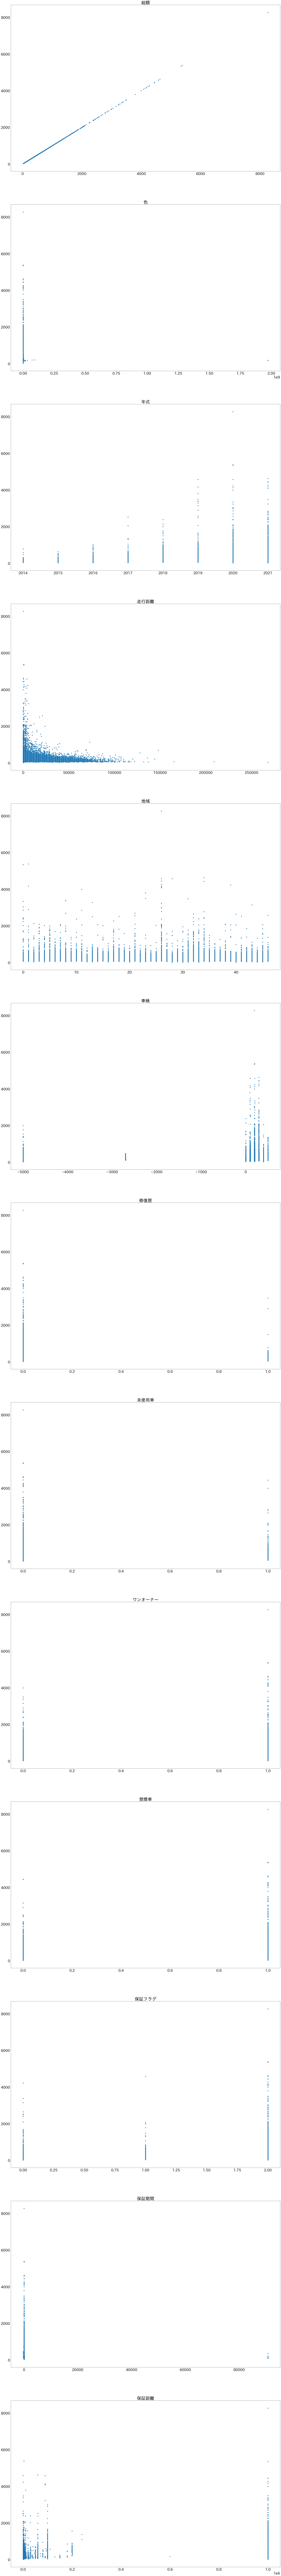

In [ ]:
all_plot(df_final)

In [ ]:
df_final[df_final['総額'] > 5000]
#外れ値だから消した方が良くない？？

In [ ]:
df_final.describe()